# COMP 352 Final Project Example

**Author:** Daniel Matlock

**Date:** 1/30/2024

### Housing Prices

#### Competition: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques
#### Full dataset: https://www.kaggle.com/datasets/marcopale/housing

The Ames Housing dataset was compiled by Dean De Cock for use in data science education. It's an incredible alternative for data scientists looking for a modernized and expanded version of the often cited Boston Housing dataset.

You cannot use this dataset for your final project.

### Final Project Requirements:  
There are four sections of the final project. You are expected to perform the following tasks within each section to fulfill the project requirements. 

- **Data Importing and Pre-processing (100 Points)**
    - Import dataset and describe characteristics such as dimensions, data types, file types, and import methods used
    - Clean, wrangle, and handle missing data, duplicate data, etc.
    - Encode any categorical variables
    - Perform feature engineering on the dataset
    - Transform data appropriately using techniques such as aggregation, normalization, and feature construction
    - Reduce redundant data and perform need based discretization
- **Data Analysis and Visualization (100 Points)**
    - Identify categorical, ordinal, and numerical variables within data
    - Provide measures of centrality and distribution with visualizations
    - Diagnose for correlations between variables and determine independent and dependent variables
    - Perform exploratory analysis in combination with visualization techniques to discover patterns and features of interest
    - Create visualizations that allow for the discovery of insights in the data
- **Data Analytics (100 Points)**
    - Determine the need for a supervised or unsupervised learning method and identify dependent and independent variables
    - Choose and provide reasoning for the selected metric or metrics employed to assess your model.
    - Train, test, cross validate, and provide performance metrics for model results
    - Try multiple different types of algorithms to determine the best model for your dataset
    - Analyze your model performance
- **Presentation & Peer Evaluation (50 Points)**
    - In a 5 to 10 minute slide presentation, briefly explain the project workflow from the code and results in your markdown notebook
    - See presentation example  for an outline of what the presentation should look like
    - This presentation will be given in front of the class on the day of the final exam. You must be in attendance to receive credit for this portion of the project, unless the professor excuses your absence.
    - State your findings from the data and provide the interpretation of results from your analysis at each stage in the project
    - Be sure to properly label visualizations in your presentation (axis labels, human readable column names, etc.) 
    - Complete the peer evaluation form  for each member of the group.

## Table of Contents:
* [Environment Setup](#env-setup)
* [Data Importing and Pre-processing](#data-importing)
* [Data Analysis and Visualization](#data-vis)
* [Data Analytics](#data-analytics)

## Environment Setup <a class="anchor" id="env-setup"></a>

First we must setup our environment to make sure we have all appropriate modules installed. To do this, I have provided 2 methods. The 1st, is to install all modules using a ```.yaml``` file via ```conda```. 

To do this, run:
```bash
conda env create -f env_setup/data_environment.yml
```
Then activate the environment by:
```bash
conda activate data_env
```

You can also use the ```requirements.txt``` file to download the modules via ```pip```.

To do this, first make create and activate your environment:
```bash
conda create -n my_data_env
conda activate my_data_env
```

You may need to install setup tools. To do this run (Note you may need to change ```pip3``` to ```pip```):
```bash
pip3 install --upgrade pip setuptools wheel
```

and then run:
```bash
pip3 install -r env_setup/requirements.txt
```

## Data Importing and Pre-processing <a class="anchor" id="data-importing"></a>

In [1]:
# import libraries needed
import pandas as pd

pd.set_option("display.max_columns", None)
import warnings

import branca
import folium
import geopandas as gpd
import lightgbm as lgb
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import xgboost as xgb
from branca.element import Figure
from folium import Marker
from folium.plugins import HeatMap
from scipy.special import boxcox1p
from scipy.stats import norm, probplot, skew
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet, LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from utils.model_utils import (
    time_series_split_regression,
    StackedEnsembleCVRegressor,
)
from utils.metrics_utils import (
    compute_rmse_std,
    print_rmse_and_dates,
)

warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=FutureWarning, module="pandas.*")
%matplotlib inline

In [2]:
# read in file
# housing_df = pd.read_csv('house_prices/train.csv')
housing_df = pd.read_csv("house_prices/AmesHousing.csv")

In [3]:
# check number of rows and columns
housing_df.shape

(2930, 82)

In [4]:
# count the number of categorical variables
cat_count = 0
for dtype in housing_df.dtypes:
    if dtype == "object":
        cat_count = cat_count + 1

In [5]:
print("# of categorical variables:", cat_count)

numeric_vars = housing_df.shape[1] - cat_count - 1
print(
    "# of contineous variables:", numeric_vars
)  # subtract and extra column as 1 column is an ID column

# of categorical variables: 43
# of contineous variables: 38


In [6]:
housing_df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,NaN,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [7]:
# Drop the 'order' column and rename the 'PID' column to 'Id'
housing_df = housing_df.drop(columns=["Order"])
housing_df = housing_df.rename(columns={"PID": "Id"})

In [8]:
# check the column names
housing_df.columns

Index(['Id', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish',

In [9]:
# Remove spaces from column names
housing_df.columns = [col.replace(" ", "") for col in housing_df.columns]

### Handling missing data

In [10]:
# missing data
total = housing_df.isnull().sum().sort_values(ascending=False)
percent = (housing_df.isnull().sum() / housing_df.isnull().count()).sort_values(
    ascending=False
)
missing_data = pd.concat([total, percent], axis=1, keys=["Total", "Percent"])
missing_data.head(20)

,Total,Percent
PoolQC,2917,0.995563
MiscFeature,2824,0.963823
Alley,2732,0.932423
Fence,2358,0.804778
MasVnrType,1775,0.605802
FireplaceQu,1422,0.485324
LotFrontage,490,0.167235
GarageCond,159,0.054266
GarageFinish,159,0.054266
GarageYrBlt,159,0.054266


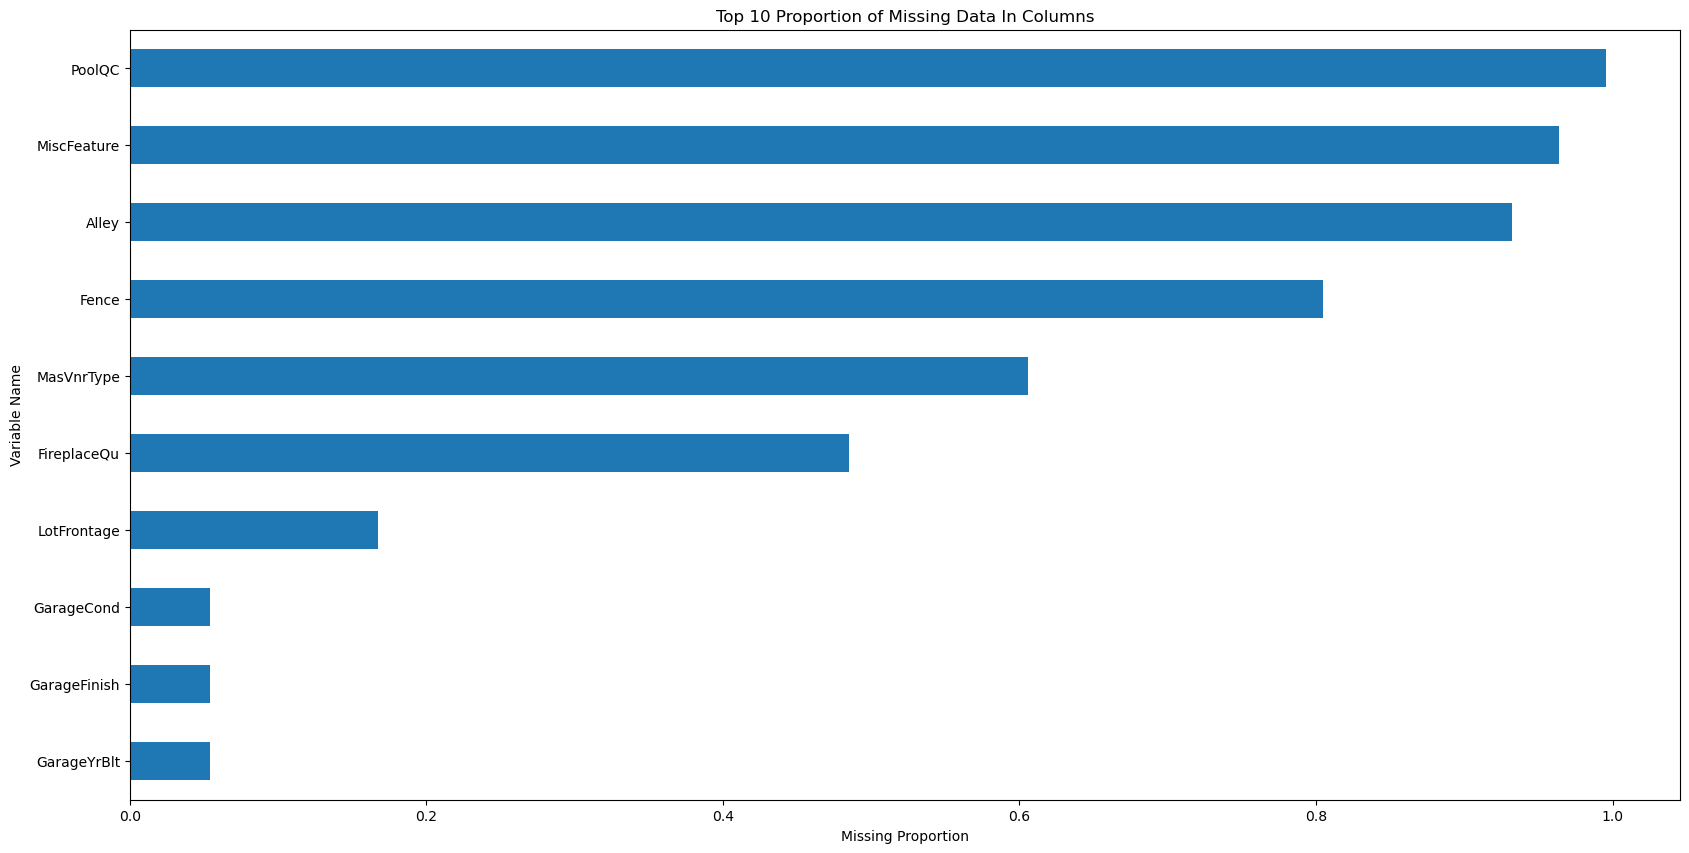

In [11]:
missing_data["Percent"].head(10).plot(
    kind="barh", figsize=(20, 10)
).invert_yaxis()  # top 10 missing columns
plt.xlabel("Missing Proportion")
plt.ylabel("Variable Name")
plt.title("Top 10 Proportion of Missing Data In Columns")
plt.show()

In [12]:
# Columns to fill with 'None'
# These fields have low cardinatlity and adding a class "None" allows us to capture this data without removing the record
columns_to_fill_none = [
    "PoolQC",
    "MiscFeature",
    "Alley",
    "Fence",
    "FireplaceQu",
    "GarageType",
    "GarageFinish",
    "GarageQual",
    "GarageCond",
    "BsmtQual",
    "BsmtCond",
    "BsmtExposure",
    "BsmtFinType1",
    "BsmtFinType2",
    "MasVnrType",
    "MSSubClass",
]

for col in columns_to_fill_none:
    housing_df[col] = housing_df[col].fillna("None")

In [13]:
# Columns to fil with 0
# Where these fields are NULL, the houses do not have these items (i.e. that is does not have a basement, etc.)
# We distinguish these in the data by imputing them all as NULL so they will be identifiable by our model
numeric_cols = [
    "MasVnrArea",
    "GarageYrBlt",
    "GarageArea",
    "GarageCars",
    "BsmtFinSF1",
    "BsmtFinSF2",
    "BsmtUnfSF",
    "TotalBsmtSF",
    "BsmtFullBath",
    "BsmtHalfBath",
]

for col in numeric_cols:
    housing_df[col] = housing_df[col].fillna(0)

In [14]:
# These fields are missing data that should be present
# We want to impute this data as best as possible
# Housing is largely geo-spatially similar (i.e. the neighbors house has a high probability of being similar)
# So a good way to impute this missing data is ot use the median value from the neighborhood
housing_df["LotFrontage"] = housing_df.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median())
)

# Some neighborhoods have NULL for all entries of LotFrontage
# For these, we use the entire datasets median value
# Another approach would be to use the median value from all neighborhoods that are connected to the missing neighborhood
# The approach would be to visualize the neighborhoods and manually check which neighborhoods are adjacent
housing_df["LotFrontage"] = housing_df["LotFrontage"].fillna(
    housing_df["LotFrontage"].median()
)

## IMPORTANT QUESTION
### Is imputing missing values using the median from the entire dataset data leakage?

Remember _data leakage_ is the following: 

- Unintentional or improper exposure of information from the training data to the model during the training process. 
- It occurs when information that would not be available in a real-world scenario is used in the training set, leading the model to learn patterns that do not generalize well.

So the question for this example is: 
- Can we impute the values of _LotFrontage_ using the whole dataset, or can we only use those values in the training dataset?

The answer is it depends on how the data is sourced. Let's follow these 2 scenarios:

- **Scenario 1:** Suppose for our data we have both a housing property characteristics dataset and housing sales dataset. 
    - In this scenario, **YES, you can impute the median of _LotFrontage_ using the whole dataset**.
    - The reason you can do this is because you will have all housing property characteristics at all times for both homes that sold and did not sell. Your dataset will consist of all known properties and its characteristics and will most likely be joined to a sales dataset allowing you to impute missing values using the median from the entire dataset.

- **Scenario 2:** Suppose for our data we have only a housing sales dataset that includes the property characteristics.
    - In this scenario, **NO, you cannot impute the median of _LotFrontage_ using the whole dataset**.
    - The reason for this is because you ONLY have sales data and thus you do not have all properties to use to impute missing values using the median. You can use the homes that have sold before the home in question to impute the median, but you could not use any homes after that. This is because you would not have this information at the time of building the model.

In the real world, I believe scenario 1 is more likely so I chose to presume this to be the case. However, I would not be surprised if scenario 2 is how some companies build their models.

In [15]:
# Missing categorical data in which we impute the mode (most common value)
# This is done because columns have low cardinality so the mode makes sense
# Imputing these values as a new value called "None" would be appropriate as well
# You could train 2 models: 1 using the mode, and another using "None" and compare results
columns_to_fill = [
    "Functional",
    "Electrical",
    "KitchenQual",
    "Exterior1st",
    "Exterior2nd",
    "SaleType",
    "MSZoning",
]

for column in columns_to_fill:
    housing_df[column] = housing_df[column].fillna(housing_df[column].mode()[0])

In [16]:
# We are checking to see if any columns are largely homogeneous
# Homogeneous columns provide no value to our model and can sometimes lead to overfitting
print("Categorical Columns Mode Frequency")

cat_columns = housing_df.select_dtypes(include=["object"]).columns

mode_freq_df = pd.DataFrame(columns=["column_name", "mode_frequency"])

for col in cat_columns:
    mode_value = housing_df[col].mode().iat[0]
    mode_freq  = (housing_df[col] == mode_value).mean()
    # create a new row at the next integer index
    mode_freq_df.loc[len(mode_freq_df)] = [col, mode_freq]

print(mode_freq_df.sort_values("mode_frequency", ascending=False).head(10))

Categorical Columns Mode Frequency
    column_name  mode_frequency
5     Utilities        0.998976
1        Street        0.995904
38       PoolQC        0.995563
10   Condition2        0.989761
14     RoofMatl        0.985324
26      Heating        0.984642
40  MiscFeature        0.963823
7     LandSlope        0.951877
28   CentralAir        0.933106
2         Alley        0.932423


In [17]:
# We see that the "Utilities" field is almost entirely homogeneous
housing_df["Utilities"].value_counts()

Utilities
AllPub    2927
NoSewr       2
NoSeWa       1
Name: count, dtype: int64

In [18]:
# Street is largely homogeneous but still has some value because it only has 2 distinct values
housing_df["Street"].value_counts()

Street
Pave    2918
Grvl      12
Name: count, dtype: int64

In [19]:
# Drop "Utilities" column as it is too homogeneous
housing_df = housing_df.drop(["Utilities"], axis=1)

In [20]:
# Check remaining missing values if any
all_data_na = housing_df.isnull().sum() / len(housing_df)
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(
    ascending=False
)
missing_data = pd.DataFrame({"Missing Ratio": all_data_na})
missing_data.head()

,Missing Ratio


### Handling Outliers

#### Target Variable

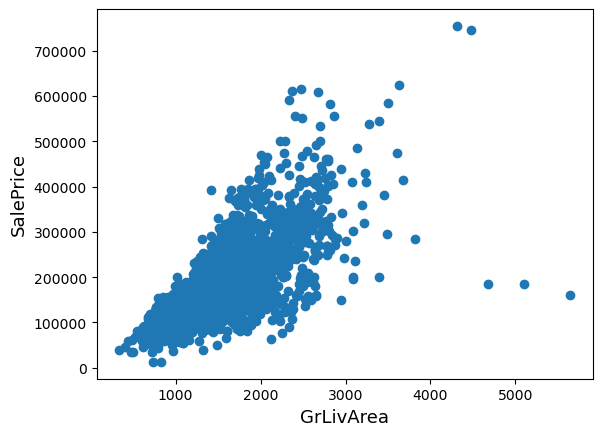

In [21]:
fig, ax = plt.subplots()
ax.scatter(x=housing_df["GrLivArea"], y=housing_df["SalePrice"])
plt.ylabel("SalePrice", fontsize=13)
plt.xlabel("GrLivArea", fontsize=13)
plt.show()

Looks like there is a few large outliers (living area is very large is sale price is not.)

For training we remove these outliers as it may skew our performance in the validation set. This will have the most impact on the linear model performance

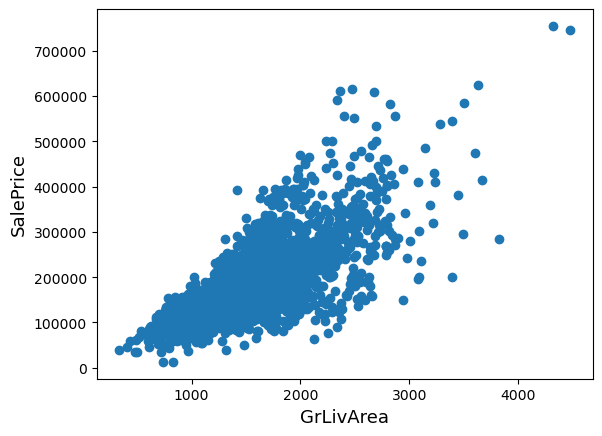

In [22]:
# Deleting outliers
housing_df = housing_df.drop(
    housing_df[
        (housing_df["GrLivArea"] > 4000) & (housing_df["SalePrice"] < 300000)
    ].index
)

# Check the graphic again
fig, ax = plt.subplots()
ax.scatter(housing_df["GrLivArea"], housing_df["SalePrice"])
plt.ylabel("SalePrice", fontsize=13)
plt.xlabel("GrLivArea", fontsize=13)
plt.show()

### Normalize Target Variable

Normalizing the target variable is important for linear model performance. It does not have an impact for tree models, thus it is best practice to do so for preprocessing.


 mu = 180800.77 and sigma = 79913.00



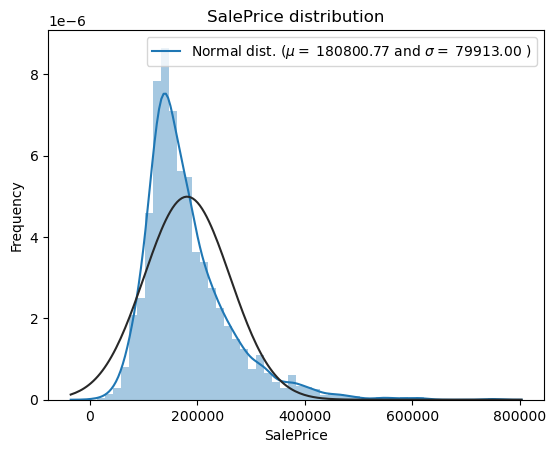

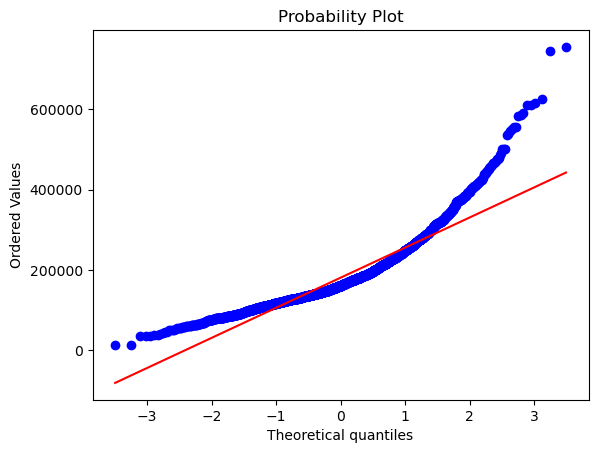

In [23]:
sns.distplot(housing_df["SalePrice"], fit=norm)

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(housing_df["SalePrice"])
print("\n mu = {:.2f} and sigma = {:.2f}\n".format(mu, sigma))

# Now plot the distribution
plt.legend(
    [r"Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )".format(mu, sigma)], loc="best"
)
plt.ylabel("Frequency")
plt.title("SalePrice distribution")

# Get also the QQ-plot
fig = plt.figure()
res = probplot(housing_df["SalePrice"], plot=plt)
plt.show()


 mu = 12.02 and sigma = 0.41



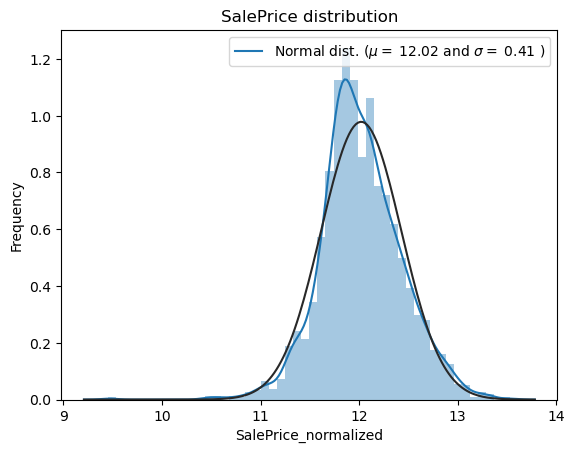

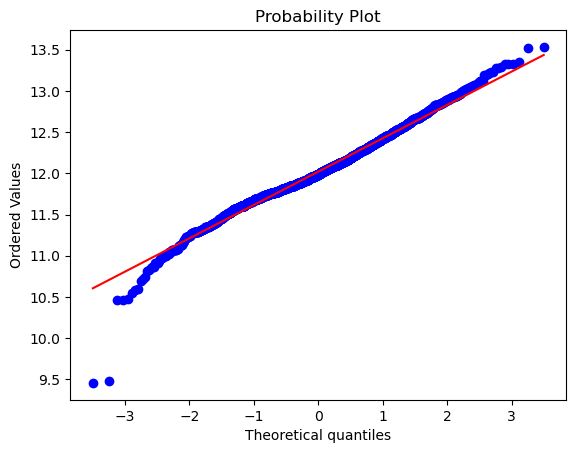

In [24]:
# We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
housing_df["SalePrice_normalized"] = np.log1p(housing_df["SalePrice"])

# Check the new distribution
sns.distplot(housing_df["SalePrice_normalized"], fit=norm)

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(housing_df["SalePrice_normalized"])
print("\n mu = {:.2f} and sigma = {:.2f}\n".format(mu, sigma))

# Now plot the distribution
plt.legend(
    [r"Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )".format(mu, sigma)], loc="best"
)
plt.ylabel("Frequency")
plt.title("SalePrice distribution")

# Get also the QQ-plot
fig = plt.figure()
res = probplot(housing_df["SalePrice_normalized"], plot=plt)
plt.show()

## Data Analysis and Visualization <a class="anchor" id="data-vis"></a>

Target Variable Scatterplots

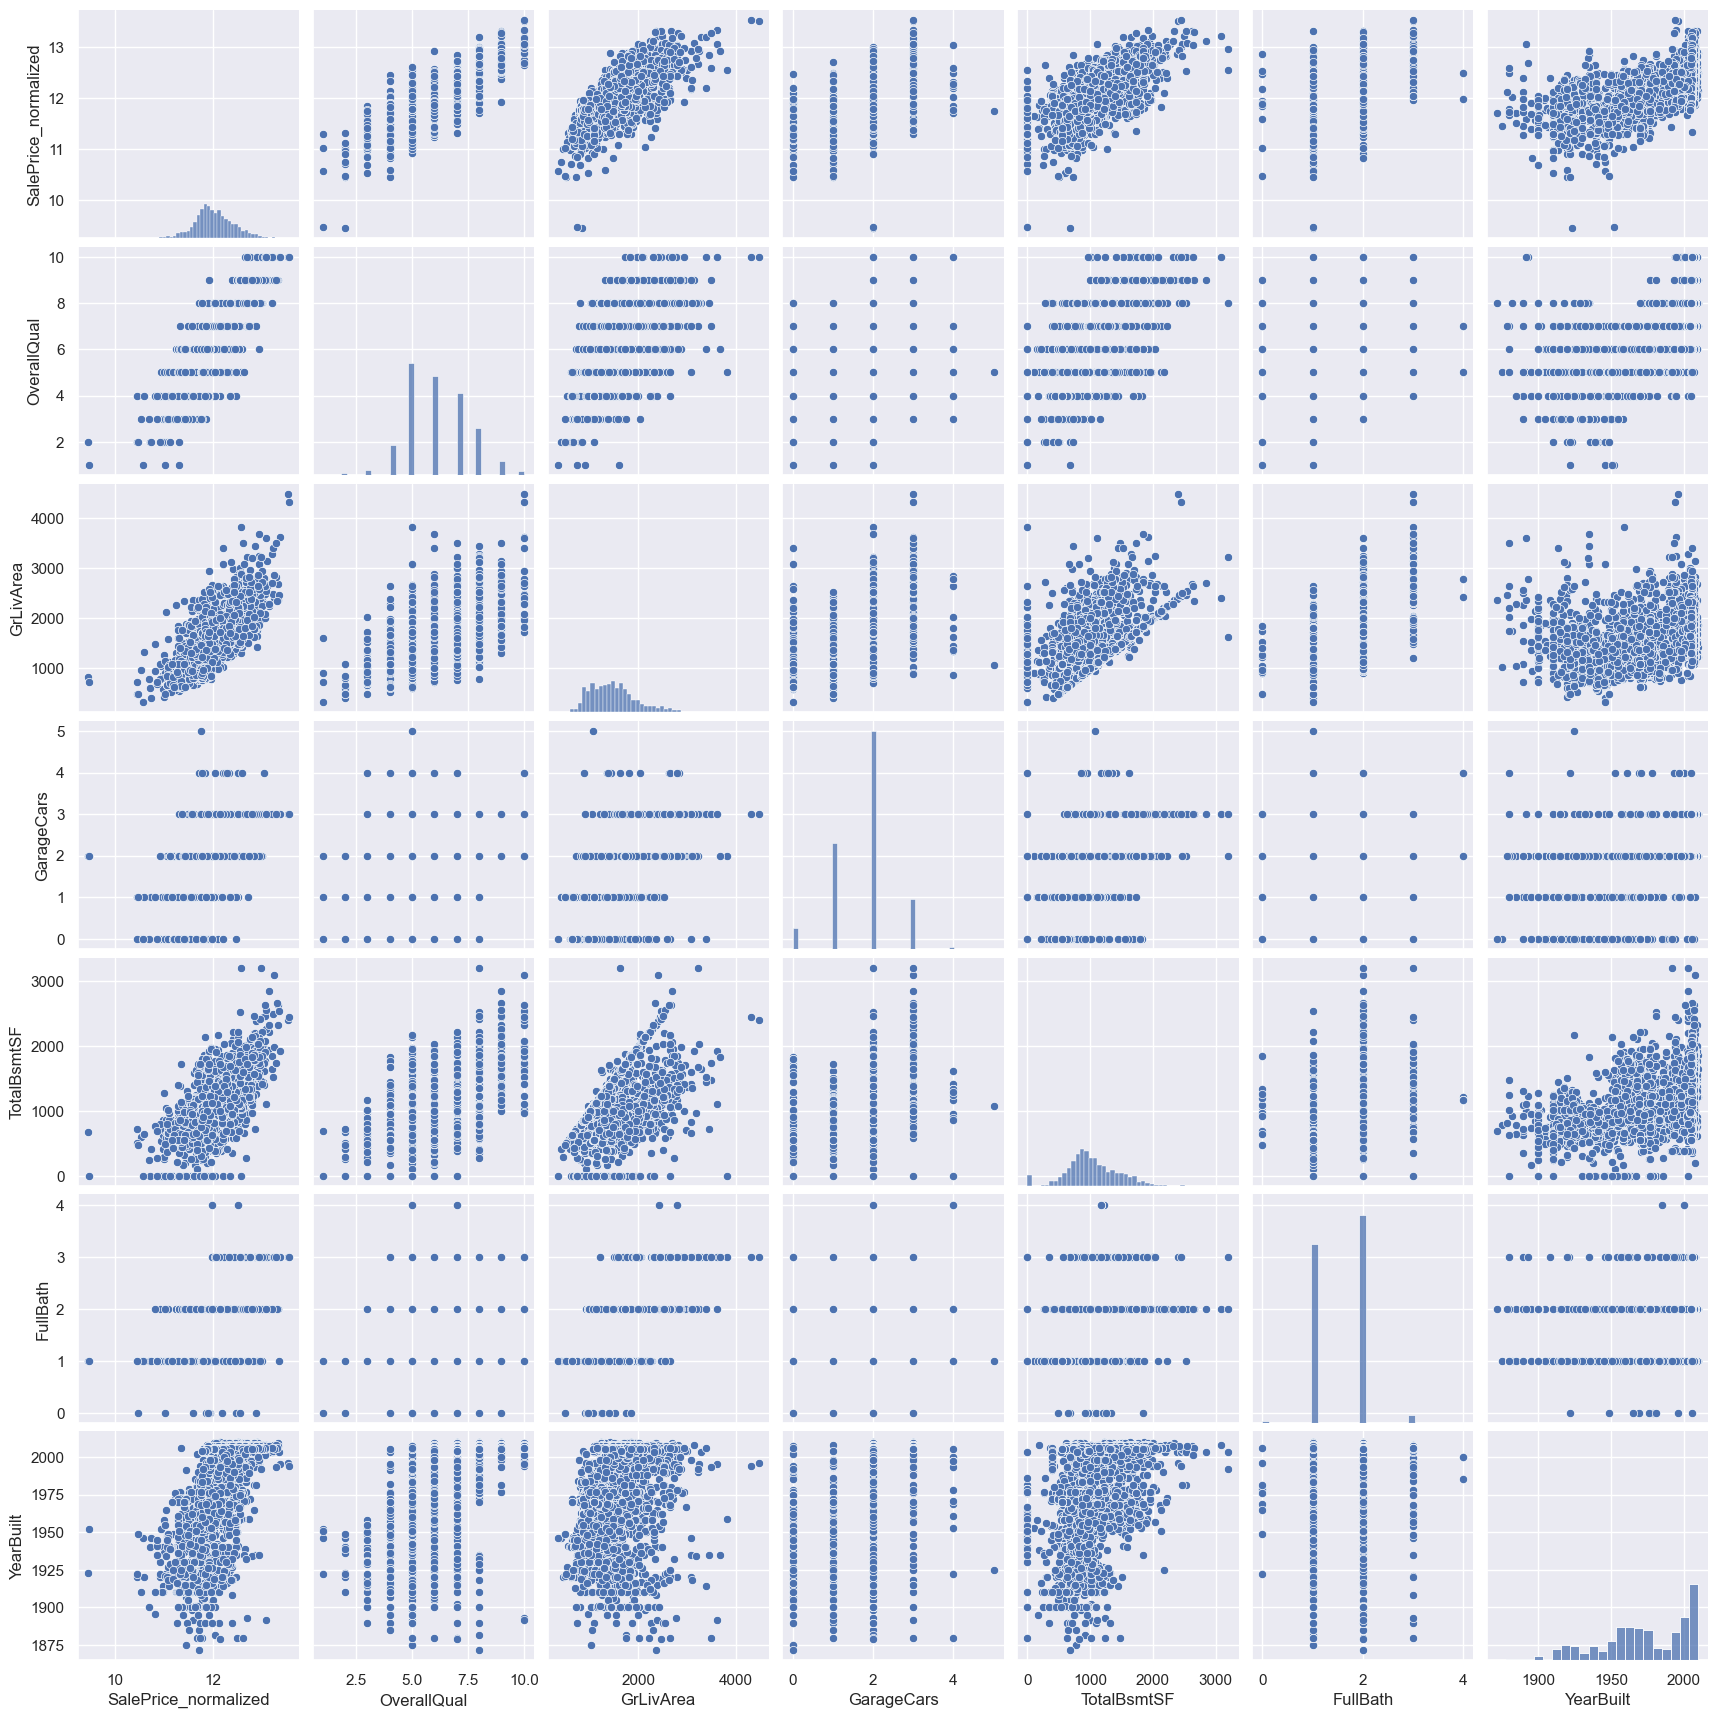

In [25]:
# scatterplot
sns.set()
cols = [
    "SalePrice_normalized",
    "OverallQual",
    "GrLivArea",
    "GarageCars",
    "TotalBsmtSF",
    "FullBath",
    "YearBuilt",
]
sns.pairplot(housing_df[cols], size=2.5)
plt.show();

Correlation Matrix

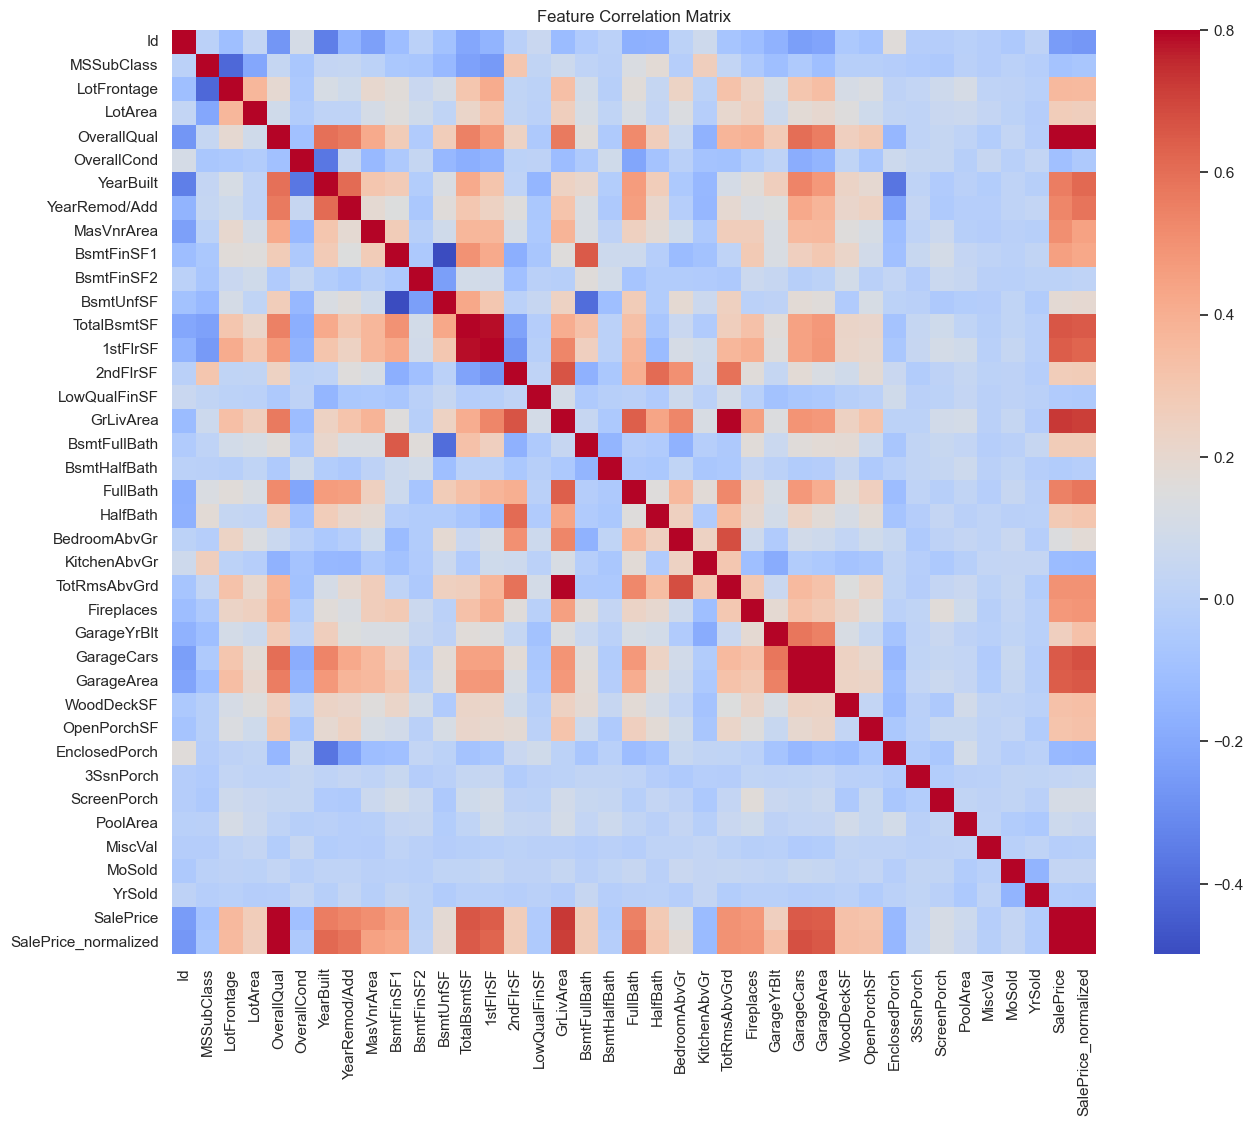

In [26]:
# Correlation map to see how features are correlated with SalePrice
# Select only the numeric columns
numeric_df = housing_df.select_dtypes(include=[np.number])
corrmat = numeric_df.corr()

# Plot
plt.figure(figsize=(15, 12))
sns.heatmap(corrmat, vmax=0.8, square=True, cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()

#### Let's visualize the data geo-spatially

Let's visualize the median sale price by zip code on a map

In [27]:
# Zip code is not in the data, so we must first map the neighborhoods to zip codes.
# This was done manually by looking up each of the neighborhoods in the data
# Ames, Iowa neighborhood to zip code mapping

neighborhood_to_zip = {
    "NAmes": "50010",
    "CollgCr": "50014",
    "OldTown": "50010",
    "Edwards": "50014",
    "Somerst": "50010",
    "NridgHt": "50014",
    "Gilbert": "50105",
    "Sawyer": "50014",
    "NWAmes": "50010",
    "SawyerW": "50014",
    "Mitchel": "50010",
    "BrkSide": "50010",
    "Crawfor": "50014",
    "IDOTRR": None,
    "Timber": "50014",
    "NoRidge": "50014",
    "StoneBr": "50010",
    "SWISU": "50011",
    "ClearCr": "50010",
    "MeadowV": "50010",
    "BrDale": "50010",
    "Blmngtn": "50010",
    "Veenker": "50011",
    "NPkVill": "50010",
    "Blueste": "50014",
    "Greens": "50010",
    "GrnHill": "50010",
    "Landmrk": None,
}

# zip to lat lon dataset https://www.kaggle.com/datasets/joeleichter/us-zip-codes-with-lat-and-long
housing_df["zip_code"] = housing_df["Neighborhood"].map(neighborhood_to_zip)
zip_to_lat_lon = pd.read_csv("house_prices/zip_lat_long.csv", dtype=str)

housing_df = pd.merge(
    housing_df, zip_to_lat_lon, left_on="zip_code", right_on="ZIP", how="left"
)
housing_df = housing_df.drop(["ZIP"], axis=1)

# Let's rename LAT and LNG to be more accurate field names
# Also let's encode LAT and LNG as numerics
housing_df.rename(
    columns={"LAT": "ZIP_centroid_LAT", "LNG": "ZIP_centroid_LON"}, inplace=True
)

housing_df["ZIP_centroid_LAT"] = housing_df["ZIP_centroid_LAT"].astype(float).fillna(0)
housing_df["ZIP_centroid_LON"] = housing_df["ZIP_centroid_LON"].astype(float).fillna(0)

# compute the median sale price by zip code
avg_price_by_zip = (
    housing_df.groupby(["zip_code", "ZIP_centroid_LAT", "ZIP_centroid_LON"])[
        "SalePrice"
    ]
    .median()
    .reset_index()
)

In [28]:
# Download shape file from census
# https://www.census.gov/geographies/mapping-files/2013/geo/carto-boundary-file.html
zip_shapefile_path = "cb_2013_us_zcta510_500k/cb_2013_us_zcta510_500k.shp"

# Load the shapefile
zip_geo_df = gpd.read_file(zip_shapefile_path)

ames_iowa_zips = list(avg_price_by_zip["zip_code"].unique())
ames_iowa_zips_df = zip_geo_df[zip_geo_df["ZCTA5CE10"].isin(ames_iowa_zips)]

zip_geo_df = ames_iowa_zips_df.merge(
    avg_price_by_zip, how="left", left_on="ZCTA5CE10", right_on="zip_code"
)

In [29]:
# Create a GeoDataFrame with centroids
centroids_df = gpd.GeoDataFrame(zip_geo_df[["geometry", "SalePrice"]])
centroids_df["geometry"] = centroids_df["geometry"].centroid
centroids_df["latitude"] = centroids_df["geometry"].y
centroids_df["longitude"] = centroids_df["geometry"].x

# Center the map around the median latitude and longitude of your data
center_lat, center_lon = (
    zip_geo_df.geometry.centroid.y.median(),
    zip_geo_df.geometry.centroid.x.median(),
)

fig = Figure(width=500, height=300)

# Create a folium map
ames_iowa_map = folium.Map(
    location=[center_lat, center_lon], zoom_start=10, control_scale=True
)
fig.add_child(ames_iowa_map)

# specify the min and max values of your data
colormap = branca.colormap.linear.YlOrRd_09.scale(150000, 190000)
colormap = colormap.to_step(index=[150000, 180000, 185000, 190000])
colormap.caption = "Median Sale Price by Zip Code"
colormap.add_to(ames_iowa_map)

# Create a GeoJson layer with your GeoDataFrame and add it to the map
geojson_data = zip_geo_df.to_json()
folium.GeoJson(
    geojson_data,
    name="choropleth",
    style_function=lambda feature: {
        "fillColor": colormap(feature["properties"]["SalePrice"]),
        "color": "black",
        "weight": 2,
        "fillOpacity": 0.7,
    },
).add_to(ames_iowa_map)

# Ensure that the size of latitude, longitude, and SalePrice arrays are the same
heat_data = [
    [row["latitude"], row["longitude"], row["SalePrice"]]
    for idx, row in centroids_df.iterrows()
]

# Create a HeatMap using the original coordinates from the GeoDataFrame
HeatMap(heat_data, radius=10, blur=15).add_to(ames_iowa_map)

# Add markers with SalePrice as pop-up information
for idx, row in centroids_df.iterrows():
    Marker(
        [row["latitude"], row["longitude"]], popup=f'SalePrice: {row["SalePrice"]}'
    ).add_to(ames_iowa_map)

# Display the map
ames_iowa_map

Let's do a little bit of feature engineering to help transform our data.

In [30]:
# Some numeric fields are best converted to categorical variables to encode
# This may provide the most value as it increases the complexity; be wary of this approach as it may lead to overfitting

# MSSubClass=The building class
housing_df["MSSubClass"] = housing_df["MSSubClass"].apply(str)


# Changing OverallCond into a categorical variable
housing_df["OverallCond"] = housing_df["OverallCond"].astype(str)

# Year and month sold are transformed into integer features
housing_df["YrSold"] = housing_df["YrSold"].astype(int)
housing_df["MoSold"] = housing_df["MoSold"].astype(int)

# Adding a date_sold feature to allow us to train-test split our data via a date.
# Also allows us to do some temporal analysis
housing_df["date_sold"] = pd.to_datetime(
    housing_df["YrSold"].astype(str) + housing_df["MoSold"].astype(str), format="%Y%m"
)

# Adding total sqfootage feature
housing_df["TotalSF"] = (
    housing_df["TotalBsmtSF"] + housing_df["1stFlrSF"] + housing_df["2ndFlrSF"]
)

#### Time series visualizations
Let's do some time series visualizations

In [31]:
avg_sale_price_by_month = housing_df.groupby("date_sold")["SalePrice"].agg(
    ["mean", "count"]
)
avg_sale_price_by_month = avg_sale_price_by_month.rename(
    columns={"mean": "AverageSalePrice", "count": "NumberOfSales"}
)

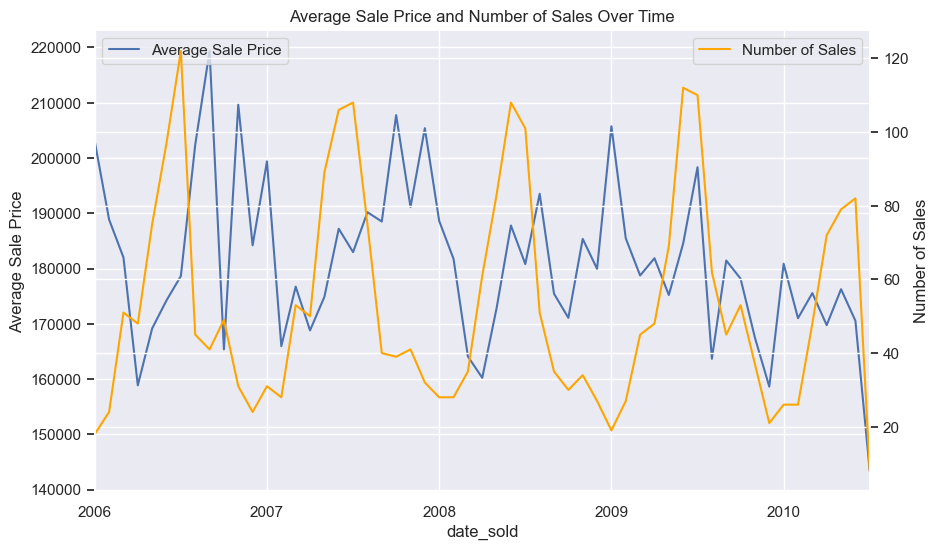

In [32]:
# Set a larger figure size
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1 = avg_sale_price_by_month["AverageSalePrice"].plot(label="Average Sale Price")
ax1.set_ylabel("Average Sale Price")

# Create a twin Axes for the second y-axis
ax2 = ax1.twinx()
avg_sale_price_by_month["NumberOfSales"].plot(
    ax=ax2, color="orange", label="Number of Sales"
)
ax2.set_ylabel("Number of Sales")

# Show legend
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

# Set title and x-axis label
plt.title("Average Sale Price and Number of Sales Over Time")
plt.xlabel("Sale Date")
plt.show()

<Figure size 1000x600 with 0 Axes>

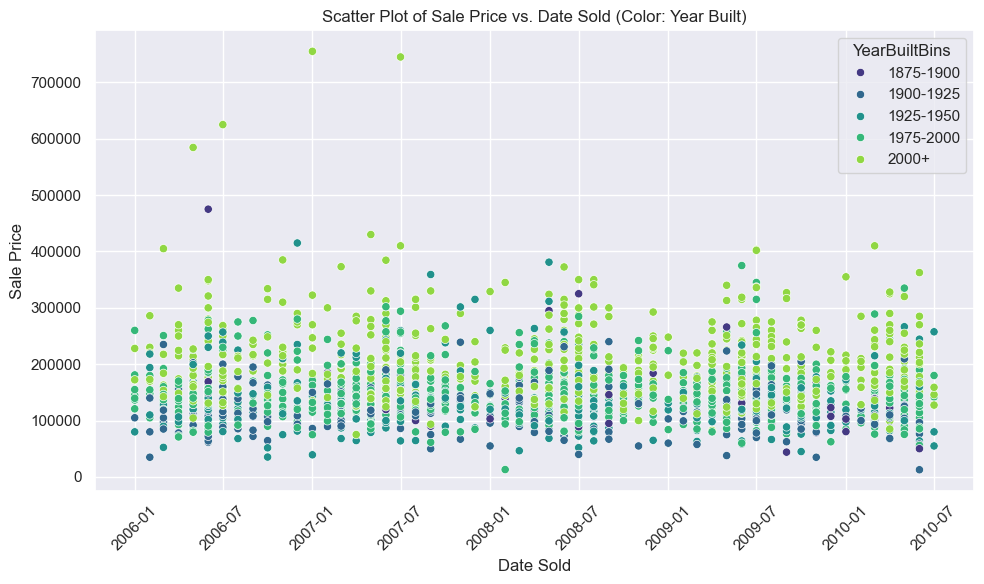

In [33]:
# Scatter plot
plt.figure(figsize=(10, 6))

# Define custom bins for YrBuilt
bins = [1875, 1900, 1925, 1950, 1975, 2000]  # Adjust the bin edges as needed
housing_df["YearBuiltBins"] = pd.cut(
    housing_df["YearBuilt"],
    bins=bins,
    labels=["1875-1900", "1900-1925", "1925-1950", "1975-2000", "2000+"],
)

# Scatter plot with custom bins for legend
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(
    x="date_sold",
    y="SalePrice",
    hue="YearBuiltBins",
    data=housing_df,
    palette="viridis",
    legend="full",
)

# Beautify the plot
plt.title("Scatter Plot of Sale Price vs. Date Sold (Color: Year Built)")
plt.xlabel("Date Sold")
plt.ylabel("Sale Price")
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

In [34]:
housing_df = housing_df.drop(["YearBuiltBins"], axis=1)

#### Label encode categorical variables

In [35]:
cols = (
    "FireplaceQu",
    "BsmtQual",
    "BsmtCond",
    "GarageQual",
    "GarageCond",
    "ExterQual",
    "ExterCond",
    "HeatingQC",
    "PoolQC",
    "KitchenQual",
    "BsmtFinType1",
    "BsmtFinType2",
    "Functional",
    "Fence",
    "BsmtExposure",
    "GarageFinish",
    "LandSlope",
    "LotShape",
    "PavedDrive",
    "Street",
    "Alley",
    "CentralAir",
    "MSSubClass",
    "OverallCond",
    "YrSold",
    "MoSold",
    "Exterior1st",
    "Exterior2nd",
)

# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder()
    lbl.fit(list(housing_df[c].values))
    housing_df[c] = lbl.transform(list(housing_df[c].values))

# shape
print("Shape housing_df: {}".format(housing_df.shape))

Shape housing_df: (2927, 86)


In [36]:
numeric_feats = housing_df.dtypes[
    (housing_df.dtypes != "object") & (housing_df.dtypes != "datetime64[ns]")
].index

# Check the skew of all numerical features
skewed_feats = (
    housing_df[numeric_feats]
    .apply(lambda x: skew(x.dropna()))
    .sort_values(ascending=False)
)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({"Skew": skewed_feats})
skewness.head(20)


Skew in numerical features: 



,Skew
MiscVal,22.221198
PoolArea,17.719247
LotArea,13.178732
LowQualFinSF,12.105635
3SsnPorch,11.391990
ZIP_centroid_LON,5.307604
LandSlope,4.982762
KitchenAbvGr,4.309065
BsmtFinSF2,4.136226
EnclosedPorch,4.010074


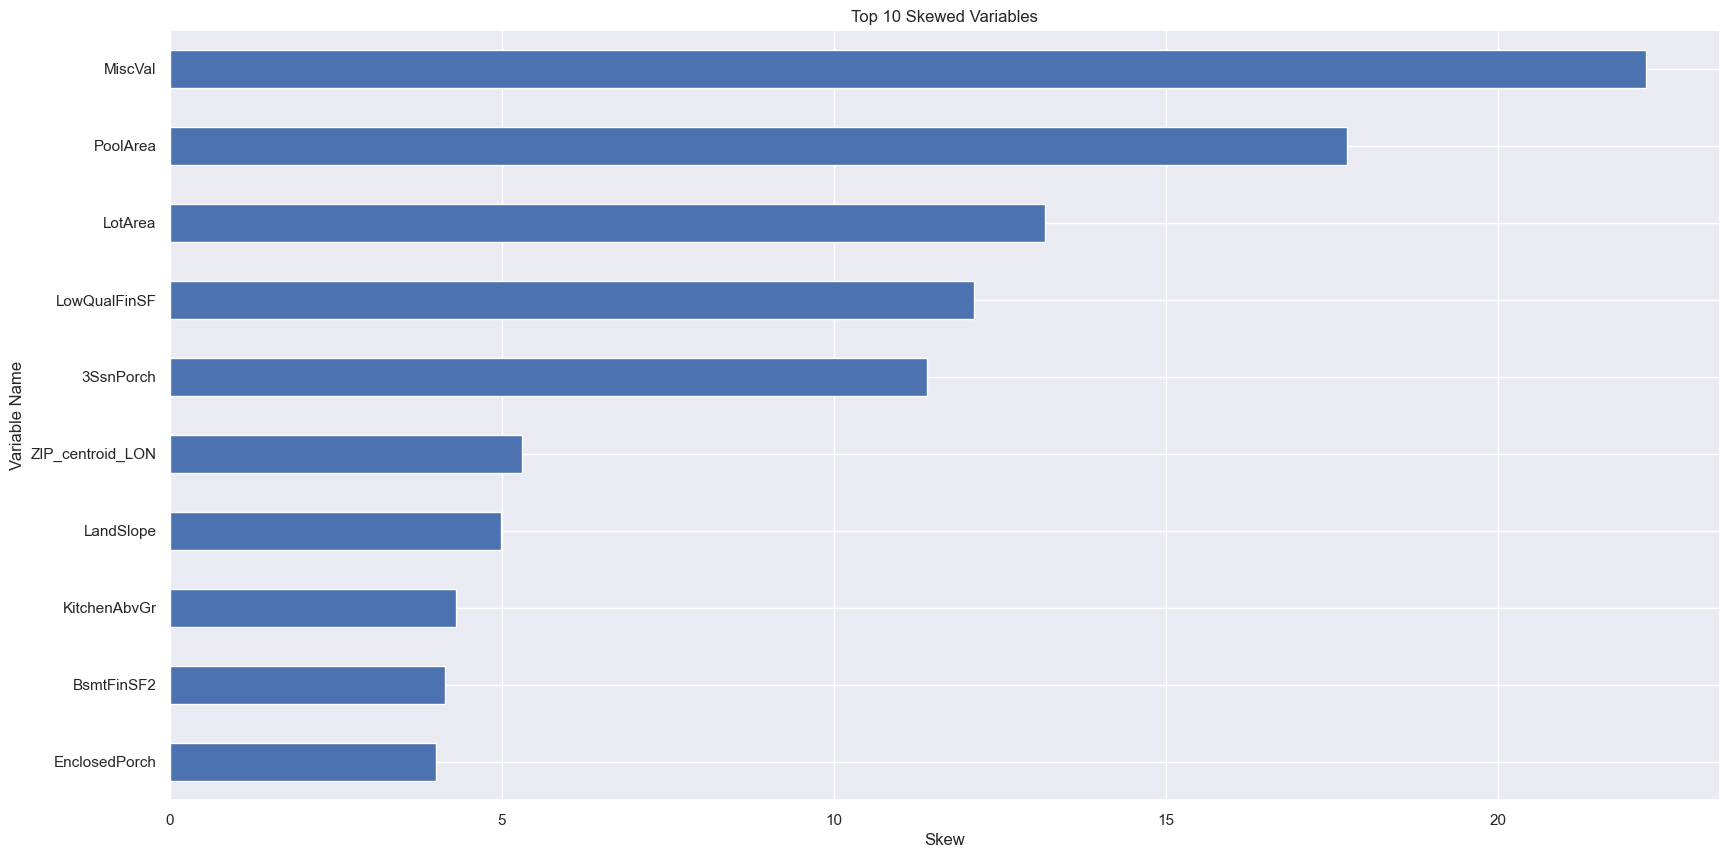

In [37]:
skewness["Skew"].head(10).plot(
    kind="barh", figsize=(20, 10)
).invert_yaxis()  # top 10 missing columns
plt.xlabel("Skew")
plt.ylabel("Variable Name")
plt.title("Top 10 Skewed Variables")
plt.show()

In [38]:
# Highly skewed features are difficult for linear models to use; thus we transform them with a BoxCox transformation to help normalize the features.
# This doesn't have a deleterious impact on other model's performance, thus we are able to do this transformation
skewness = skewness[abs(skewness) > 0.75]
print(
    "There are {} skewed numerical features to Box Cox transform (normalize)".format(
        skewness.shape[0]
    )
)

skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    # all_data[feat] += 1
    # any fields with negative values will return NULL values when boxcox transformed
    # to avoid this let's skip the column ZIP_centroid_LON
    if feat not in [
        "Id",
        "SalePrice",
        "SalePrice_normalized",
        "date_sold",
        "ZIP_centroid_LON",
    ]:
        housing_df[feat] = boxcox1p(housing_df[feat], lam)

# all_data[skewed_features] = np.log1p(all_data[skewed_features])

There are 66 skewed numerical features to Box Cox transform (normalize)


In [39]:
# check that the box cot did not add any NULL values
null_columns = housing_df.columns[housing_df.isnull().any()]
null_count = housing_df[null_columns].isnull().sum()

print("Column Name: NULL Count")
for i in range(0, len(null_columns)):
    print(f"{null_columns[i]}: {null_count[i]}")

Column Name: NULL Count
zip_code: 94


In [40]:
# although Neighborhood has 28 unique values, we want to 1-hot encode this value as domain knowledge leads us to believe this will have impact
# one-hot encoding Neighborhood will add more complexity to our model, but believe this will add model lift
cat_columns = housing_df.dtypes[
    (housing_df.dtypes != "float64")
    & (housing_df.dtypes != "int64")
    & (housing_df.dtypes != "datetime64[ns]")
].index
for col in cat_columns:
    num_vals = len(housing_df[col].unique())
    col_type = housing_df[col].dtype
    print(f"{col} ({col_type}): # of unique vals: {num_vals}")

MSZoning (object): # of unique vals: 7
LandContour (object): # of unique vals: 4
LotConfig (object): # of unique vals: 5
Neighborhood (object): # of unique vals: 28
Condition1 (object): # of unique vals: 9
Condition2 (object): # of unique vals: 8
BldgType (object): # of unique vals: 5
HouseStyle (object): # of unique vals: 8
RoofStyle (object): # of unique vals: 6
RoofMatl (object): # of unique vals: 7
MasVnrType (object): # of unique vals: 5
Foundation (object): # of unique vals: 6
Heating (object): # of unique vals: 6
Electrical (object): # of unique vals: 5
GarageType (object): # of unique vals: 7
MiscFeature (object): # of unique vals: 5
SaleType (object): # of unique vals: 10
SaleCondition (object): # of unique vals: 6
zip_code (object): # of unique vals: 5


Notice the large increase in columns when we one-hot encode all these variables using the pd.get_dummies() method. We need to be careful not too increase complexity too much that we are not overfitting.

In [41]:
housing_df = pd.get_dummies(housing_df)
print(housing_df.shape)
housing_df.head()

(2927, 208)


,Id,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemod/Add,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SalePrice,SalePrice_normalized,ZIP_centroid_LAT,ZIP_centroid_LON,date_sold,TotalSF,MSZoning_A (agr),MSZoning_C (all),MSZoning_FV,MSZoning_I (all),MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_CBlock,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,MiscFeature_Gar2,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_VWD,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,zip_code_50010,zip_code_50011,zip_code_50014,zip_code_50105
0,526301100,2.055642,7.353462,24.898884,0.730463,0.730463,0.000000,0.0,2.259674,1.820334,14.119786,14.119786,1.540963,2.885846,6.881187,1.540963,1.820334,2.055642,1.194318,0.730463,0.730463,10.905922,2.259674,0.000000,9.956819,12.343354,0.730463,0.730463,13.601157,0.000000,0.0,13.601157,0.730463,0.0,0.730463,0.000000,1.540963,0.730463,1.820334,2.440268,2.440268,1.194318,1.194318,14.119786,0.000000,1.194318,10.410943,2.055642,2.055642,0.730463,8.211558,5.744420,0.0,0.0,0.000000,0.0,1.540963,1.820334,0.000000,1.820334,1.820334,215000,12.278398,5.054632,-93.588400,2010-05-01,15.185775,False,False,False,False,False,True,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,F

## Data Analytics <a class="anchor" id="data-analytics"></a>

Imported at the beginning of our notebook, are 3 critical functions for evaluating our model properly:
- hyperparameter_tune_bayesian
- time_series_split_regression
- print_rmse_and_dates

**hyperparameter_tune_bayesian:**
- Takes the train dataset and the algorithm type as an input and tunes the hyperparameters
- Uses a 5 fold cross validated Bayesian Search on the train set to find the best hyperparameters
- It only takes in gradient boosted machines as a algorithm type
- It returns a dict of the optimal hyperparameters found

**time_series_split_regression:**
- This is the main function where the training happens
- By default, it performs a 5 fold time series cross-validated train of a specified regressor algorithm
- The _tune_hyperparameters_ parameter allows the hyperparameters for each fold to be tuned by calling the _hyperparameter_tune_bayesian_ function
- Some of the key things this function returns are:
    - DataFrame containing the Id, actual value, predicted value, fold, and whether it was in the test or train set
    - List of RMSE scores for each split

**compute_rmse_std:**
- This prints the RMSE and dates of each fold for a specified model

In [42]:
# Linear regression models
# 3 types here: with intercept, without intercept, and Elastic Net (both L1 and L2 regularization)
lr_w_int = LinearRegression()
lr_no_int = LinearRegression(fit_intercept=False)
elastic_net = ElasticNet(
    alpha=0.01, l1_ratio=0.1
)  # Adjust alpha and l1_ratio as needed

In [43]:
neigh = KNeighborsRegressor(n_neighbors=10)

In [44]:
rf = RandomForestRegressor(n_estimators=500)

In [45]:
dt = DecisionTreeRegressor(max_depth=10)

In [46]:
model_xgb = xgb.XGBRegressor(max_depth=5, n_estimators=1000, learning_rate=0.01)

In [47]:
model_lgb = lgb.LGBMRegressor(max_depth=5, n_estimators=1000, learning_rate=0.01, verbosity=-1)

#### Algotithm Results on a 5 Fold Cross Validation

The method has many default parameters, so we do not need to feed in parameters for values such as the number of folds.

In [48]:
(
    lr_w_int_preds_df,
    lr_w_int_rmse,
    lr_w_int_split_dates,
    num_records,
) = time_series_split_regression(
    housing_df,
    regressor=lr_w_int,
)

# Print RMSE scores and split dates for each split
print_rmse_and_dates(
    lr_w_int_rmse, lr_w_int_split_dates, num_records, "Linear Regression (w/ Intercept)"
)

Split 1: Min Date: 2006-09-01, Max Date: 2007-06-01, RMSE: 86074.45374794638, Train Records: 492, Test Records: 487
Split 2: Min Date: 2007-06-01, Max Date: 2008-04-01, RMSE: 24514.89355830917, Train Records: 979, Test Records: 487
Split 3: Min Date: 2008-04-01, Max Date: 2009-01-01, RMSE: 21754.62009498731, Train Records: 1466, Test Records: 487
Split 4: Min Date: 2009-01-01, Max Date: 2009-09-01, RMSE: 20174.603436773872, Train Records: 1953, Test Records: 487
Split 5: Min Date: 2009-09-01, Max Date: 2010-07-01, RMSE: 19977.934208730294, Train Records: 2440, Test Records: 487
Linear Regression (w/ Intercept) RMSE score: 34499.3010 (25838.6483)



Linear regression sometimes does not generalize well. Removing the intercept sometimes helps generalizes better.

In [49]:
(
    lr_no_int_preds_df,
    lr_no_int_rmse,
    lr_no_int_split_dates,
    num_records,
) = time_series_split_regression(
    housing_df,
    regressor=lr_no_int,
)

print_rmse_and_dates(
    lr_no_int_rmse,
    lr_no_int_split_dates,
    num_records,
    "Linear Regression (No Intercept)",
)

Split 1: Min Date: 2006-09-01, Max Date: 2007-06-01, RMSE: 87972.91416129006, Train Records: 492, Test Records: 487
Split 2: Min Date: 2007-06-01, Max Date: 2008-04-01, RMSE: 33146.11685306107, Train Records: 979, Test Records: 487
Split 3: Min Date: 2008-04-01, Max Date: 2009-01-01, RMSE: 30432.07555500319, Train Records: 1466, Test Records: 487
Split 4: Min Date: 2009-01-01, Max Date: 2009-09-01, RMSE: 20174.603436773818, Train Records: 1953, Test Records: 487
Split 5: Min Date: 2009-09-01, Max Date: 2010-07-01, RMSE: 19977.934208730825, Train Records: 2440, Test Records: 487
Linear Regression (No Intercept) RMSE score: 38340.7288 (25377.4898)



In [50]:
(
    elastic_net_preds_df,
    elastic_net_rmse,
    elastic_net_split_dates,
    num_records,
) = time_series_split_regression(
    housing_df,
    regressor=elastic_net,
)

print_rmse_and_dates(
    elastic_net_rmse,
    elastic_net_split_dates,
    num_records,
    "Elastic Net",
)

Split 1: Min Date: 2006-09-01, Max Date: 2007-06-01, RMSE: 21698.743985624893, Train Records: 492, Test Records: 487
Split 2: Min Date: 2007-06-01, Max Date: 2008-04-01, RMSE: 25738.296603093022, Train Records: 979, Test Records: 487
Split 3: Min Date: 2008-04-01, Max Date: 2009-01-01, RMSE: 20775.987883201185, Train Records: 1466, Test Records: 487
Split 4: Min Date: 2009-01-01, Max Date: 2009-09-01, RMSE: 21492.847256120258, Train Records: 1953, Test Records: 487
Split 5: Min Date: 2009-09-01, Max Date: 2010-07-01, RMSE: 20425.148447666495, Train Records: 2440, Test Records: 487
Elastic Net RMSE score: 22026.2048 (1912.9950)



In [51]:
rf_preds_df, rf_rmse, rf_split_dates, num_records = time_series_split_regression(
    housing_df,
    regressor=rf,
)
print_rmse_and_dates(rf_rmse, rf_split_dates, num_records, "Random Forest")

Split 1: Min Date: 2006-09-01, Max Date: 2007-06-01, RMSE: 28104.149432199974, Train Records: 492, Test Records: 487
Split 2: Min Date: 2007-06-01, Max Date: 2008-04-01, RMSE: 29233.056302961373, Train Records: 979, Test Records: 487
Split 3: Min Date: 2008-04-01, Max Date: 2009-01-01, RMSE: 24165.93786571867, Train Records: 1466, Test Records: 487
Split 4: Min Date: 2009-01-01, Max Date: 2009-09-01, RMSE: 24127.314977185266, Train Records: 1953, Test Records: 487
Split 5: Min Date: 2009-09-01, Max Date: 2010-07-01, RMSE: 21900.994797120773, Train Records: 2440, Test Records: 487
Random Forest RMSE score: 25506.2907 (2732.5420)



In [52]:
nn_preds_df, nn_rmse, nn_split_dates, num_records = time_series_split_regression(
    housing_df,
    regressor=neigh,
)
print_rmse_and_dates(nn_rmse, nn_split_dates, num_records, "Nearest Neighbors")

Split 1: Min Date: 2006-09-01, Max Date: 2007-06-01, RMSE: 57442.96653557117, Train Records: 492, Test Records: 487
Split 2: Min Date: 2007-06-01, Max Date: 2008-04-01, RMSE: 55450.085247449584, Train Records: 979, Test Records: 487
Split 3: Min Date: 2008-04-01, Max Date: 2009-01-01, RMSE: 45562.65452646099, Train Records: 1466, Test Records: 487
Split 4: Min Date: 2009-01-01, Max Date: 2009-09-01, RMSE: 43584.86159204753, Train Records: 1953, Test Records: 487
Split 5: Min Date: 2009-09-01, Max Date: 2010-07-01, RMSE: 39858.99607071924, Train Records: 2440, Test Records: 487
Nearest Neighbors RMSE score: 48379.9128 (6865.3006)



In [53]:
dt_preds_df, dt_rmse, dt_split_dates, num_records = time_series_split_regression(
    housing_df,
    regressor=dt,
)
print_rmse_and_dates(dt_rmse, dt_split_dates, num_records, "Decision Tree")

Split 1: Min Date: 2006-09-01, Max Date: 2007-06-01, RMSE: 41795.32199099782, Train Records: 492, Test Records: 487
Split 2: Min Date: 2007-06-01, Max Date: 2008-04-01, RMSE: 42809.94550815642, Train Records: 979, Test Records: 487
Split 3: Min Date: 2008-04-01, Max Date: 2009-01-01, RMSE: 39382.55632319907, Train Records: 1466, Test Records: 487
Split 4: Min Date: 2009-01-01, Max Date: 2009-09-01, RMSE: 35679.8703318526, Train Records: 1953, Test Records: 487
Split 5: Min Date: 2009-09-01, Max Date: 2010-07-01, RMSE: 33610.05733267507, Train Records: 2440, Test Records: 487
Decision Tree RMSE score: 38655.5503 (3520.1527)



In [54]:
xg_preds_df, xg_rmse, xg_split_dates, num_records = time_series_split_regression(
    housing_df,
    regressor=model_xgb,
)
print_rmse_and_dates(xg_rmse, xg_split_dates, num_records, "XGBoost")

Split 1: Min Date: 2006-09-01, Max Date: 2007-06-01, RMSE: 27524.53567274115, Train Records: 492, Test Records: 487
Split 2: Min Date: 2007-06-01, Max Date: 2008-04-01, RMSE: 27602.515827366173, Train Records: 979, Test Records: 487
Split 3: Min Date: 2008-04-01, Max Date: 2009-01-01, RMSE: 22633.416710695714, Train Records: 1466, Test Records: 487
Split 4: Min Date: 2009-01-01, Max Date: 2009-09-01, RMSE: 21827.213839608572, Train Records: 1953, Test Records: 487
Split 5: Min Date: 2009-09-01, Max Date: 2010-07-01, RMSE: 20686.348735337513, Train Records: 2440, Test Records: 487
XGBoost RMSE score: 24054.8062 (2931.0165)



In [55]:
lgbm_preds_df, lgbm_rmse, lgbm_split_dates, num_records = time_series_split_regression(
    housing_df,
    regressor=model_lgb,
)
print_rmse_and_dates(lgbm_rmse, lgbm_split_dates, num_records, "LightGBM")

Split 1: Min Date: 2006-09-01, Max Date: 2007-06-01, RMSE: 26884.605496853783, Train Records: 492, Test Records: 487
Split 2: Min Date: 2007-06-01, Max Date: 2008-04-01, RMSE: 27307.86345448879, Train Records: 979, Test Records: 487
Split 3: Min Date: 2008-04-01, Max Date: 2009-01-01, RMSE: 22139.87355120761, Train Records: 1466, Test Records: 487
Split 4: Min Date: 2009-01-01, Max Date: 2009-09-01, RMSE: 22265.46748095631, Train Records: 1953, Test Records: 487
Split 5: Min Date: 2009-09-01, Max Date: 2010-07-01, RMSE: 19204.361051085853, Train Records: 2440, Test Records: 487
LightGBM RMSE score: 23560.4342 (3090.7490)



Let's hyperparameter tune the XGBoost model using Bayesian Optimization. 

This should take some time. Takes ~ 1 hour for each model to tune the hyperparameters on my machine (Apple M1 Pro, 16GB RAM)

In [56]:
# parameter to decide to run hyperparameter tuning
hyperparameter_tune = False

In [57]:
if hyperparameter_tune:
    (
        xg_hyper_preds_df,
        xg_hyper_rmse,
        xg_hyper_split_dates,
        num_records,
    ) = time_series_split_regression(
        housing_df,
        regressor=model_xgb,
        tune_hyperparameters=True,
    )
    print_rmse_and_dates(xg_hyper_rmse, xg_hyper_split_dates, num_records, "XGBoost hyper")

In [58]:
if hyperparameter_tune:
    (
        lgb_hyper_preds_df,
        lgb_hyper_rmse,
        lgb_hyper_split_dates,
        num_records,
    ) = time_series_split_regression(
        housing_df,
        regressor=model_lgb,
        tune_hyperparameters=True,
    )
    print_rmse_and_dates(
        lgb_hyper_rmse, lgb_hyper_split_dates, num_records, "LightGBM hyper"
    )

In our final model we can only select 1 set of hyperparameters. Let's select the hyperparameters from the last fold as this has the most data to train with, and the lowest overall RMSE.
- Best hyperparameters for XGBoost Fold 4: OrderedDict([('learning_rate', 0.01557837106072331), ('max_depth', 3), ('n_estimators', 1200)])
- Best hyperparameters for LightGBM Fold 4: OrderedDict([('learning_rate', 0.06724242523308076), ('max_depth', 3), ('n_estimators', 781)])

In [59]:
model_xgb_hyper = xgb.XGBRegressor(
    max_depth=3, n_estimators=1200, learning_rate=0.01557837106072331
)

model_lgb_hyper = lgb.LGBMRegressor(
    max_depth=3, n_estimators=781, learning_rate=0.06724242523308076
)

In [60]:
(
    xg_hyper_select_preds_df,
    xg_hyper_select_rmse,
    xg_hyper_select_split_dates,
    num_records,
) = time_series_split_regression(
    housing_df,
    regressor=model_xgb_hyper,
)
print_rmse_and_dates(
    xg_hyper_select_rmse, xg_hyper_select_split_dates, num_records, "XGBoost hyper"
)

Split 1: Min Date: 2006-09-01, Max Date: 2007-06-01, RMSE: 24698.92046223883, Train Records: 492, Test Records: 487
Split 2: Min Date: 2007-06-01, Max Date: 2008-04-01, RMSE: 24971.412775411805, Train Records: 979, Test Records: 487
Split 3: Min Date: 2008-04-01, Max Date: 2009-01-01, RMSE: 22281.95036346684, Train Records: 1466, Test Records: 487
Split 4: Min Date: 2009-01-01, Max Date: 2009-09-01, RMSE: 21806.529664300095, Train Records: 1953, Test Records: 487
Split 5: Min Date: 2009-09-01, Max Date: 2010-07-01, RMSE: 19235.86234095056, Train Records: 2440, Test Records: 487
XGBoost hyper RMSE score: 22598.9351 (2101.2964)



In [61]:
(
    lgb_hyper_select_preds_df,
    lgb_hyper_select_rmse,
    lgb_hyper_select_split_dates,
    num_records,
) = time_series_split_regression(
    housing_df,
    regressor=model_lgb_hyper,
)
print_rmse_and_dates(
    lgb_hyper_select_rmse, lgb_hyper_select_split_dates, num_records, "LightGBM hyper"
)

Split 1: Min Date: 2006-09-01, Max Date: 2007-06-01, RMSE: 25225.76906060013, Train Records: 492, Test Records: 487
Split 2: Min Date: 2007-06-01, Max Date: 2008-04-01, RMSE: 27188.57128899303, Train Records: 979, Test Records: 487
Split 3: Min Date: 2008-04-01, Max Date: 2009-01-01, RMSE: 22143.755044867907, Train Records: 1466, Test Records: 487
Split 4: Min Date: 2009-01-01, Max Date: 2009-09-01, RMSE: 21518.348650833974, Train Records: 1953, Test Records: 487
Split 5: Min Date: 2009-09-01, Max Date: 2010-07-01, RMSE: 18118.136547241957, Train Records: 2440, Test Records: 487
LightGBM hyper RMSE score: 22838.9161 (3134.6283)



In [62]:
# plot RMSE and STD for each Algorithm
data = {
    "Linear (No Intercept)": [
        compute_rmse_std(lr_no_int_rmse)[0],
        compute_rmse_std(lr_no_int_rmse)[1],
    ],
    "Linear (w/ Intercept)": [
        compute_rmse_std(lr_w_int_rmse)[0],
        compute_rmse_std(lr_w_int_rmse)[1],
    ],
    "Elastic Net": [
        compute_rmse_std(elastic_net_rmse)[0],
        compute_rmse_std(elastic_net_rmse)[1],
    ],
    "Nearest Neighbor": [compute_rmse_std(nn_rmse)[0], compute_rmse_std(nn_rmse)[1]],
    "Decision Tree": [compute_rmse_std(dt_rmse)[0], compute_rmse_std(dt_rmse)[1]],
    "Random Forest": [compute_rmse_std(rf_rmse)[0], compute_rmse_std(rf_rmse)[1]],
    "XGBoost": [compute_rmse_std(xg_rmse)[0], compute_rmse_std(xg_rmse)[1]],
    "LightGBM": [compute_rmse_std(lgbm_rmse)[0], compute_rmse_std(lgbm_rmse)[1]],
    "XGBoost Hyper": [
        compute_rmse_std(xg_hyper_select_rmse)[0],
        compute_rmse_std(xg_hyper_select_rmse)[1],
    ],
    "LightGBM Hyper": [
        compute_rmse_std(lgb_hyper_select_rmse)[0],
        compute_rmse_std(lgb_hyper_select_rmse)[1],
    ],
}
data_df = pd.DataFrame(data=data).T.reset_index().sort_values(by=[0], ascending=True)
data_df.columns = ["Algorithm", "RMSE", "STD"]

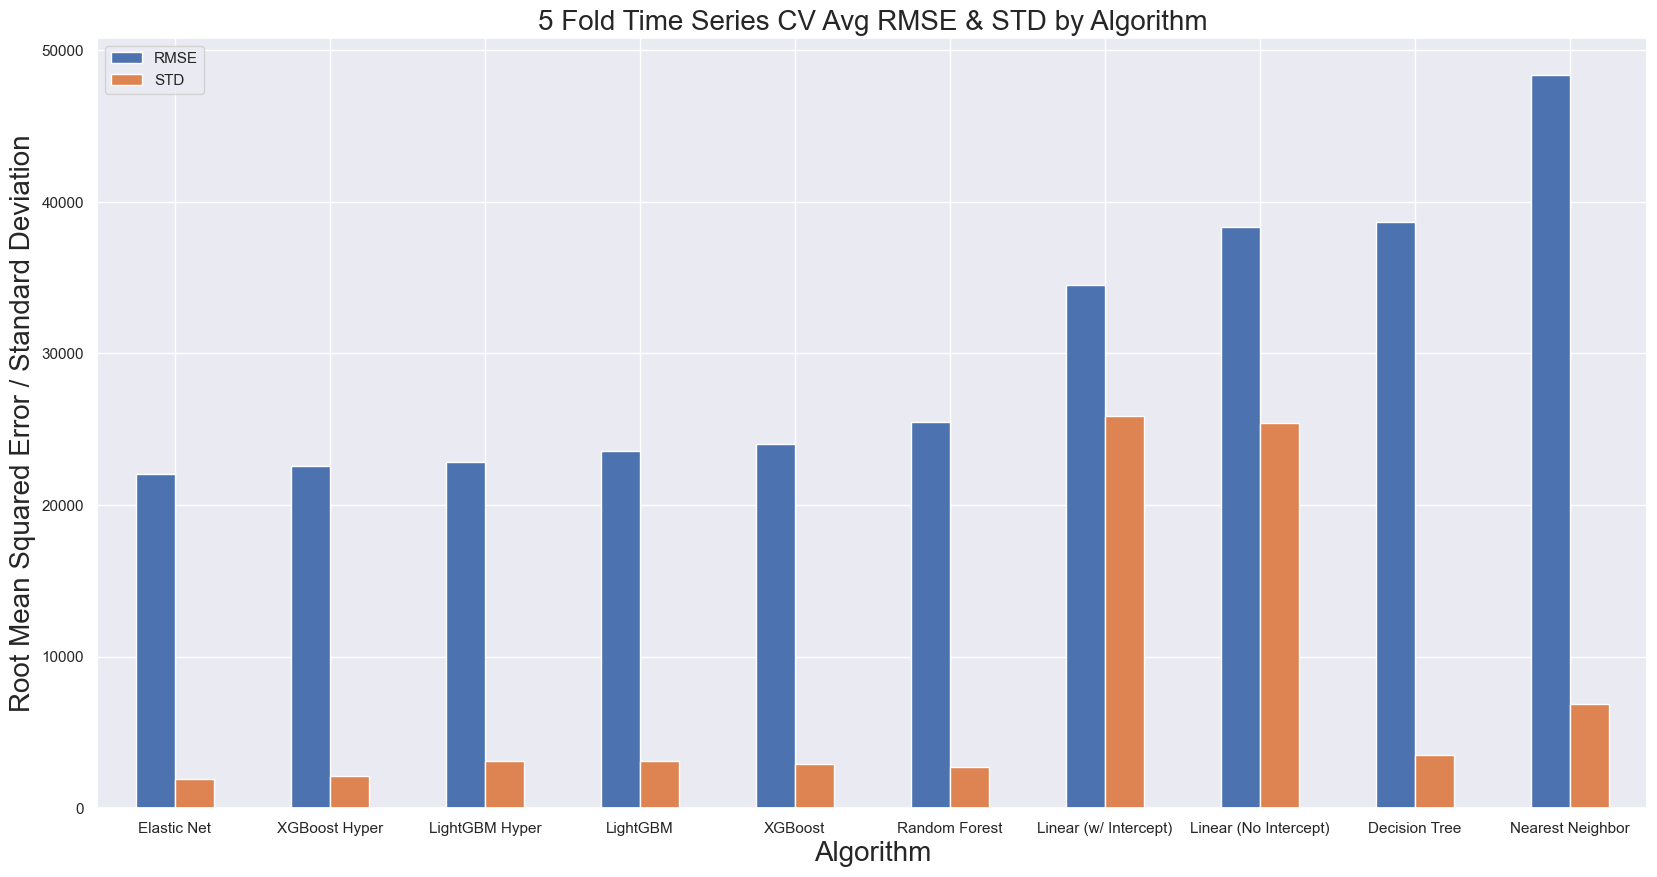

In [63]:
# creating the bar plot
data_df.plot(kind="bar", x="Algorithm", y=["RMSE", "STD"], figsize=(20, 10), rot=0)
plt.xlabel("Algorithm", fontsize=20)
plt.ylabel("Root Mean Squared Error / Standard Deviation", fontsize=20)
plt.title("5 Fold Time Series CV Avg RMSE & STD by Algorithm", fontsize=20)
plt.savefig("5_fold_results.png", bbox_inches="tight")
plt.show()

Linear models had extremely high standard deviation from the rest; this is due to 2 reasons:
- fold 0 had a much higher RMSE compared to the other folds, leading to a much higher standard deviation. This is because, for a linear model, the train set size was too small to create a performant model.
- imputation of 0 for model w/ intercept for nan or inf values (depending on the data cleaning process this may not have occurred)

The decision tree and the nearest neighbor model appeared to perform significantly worse then the rest; we will be removing these from our analysis moving forward.

The train-test split size for the early splits are significantly small; to make sure we are evaluating the linear models correctly, we will be removing the first 2 folds (fold 0 and fold 1) from our analysis.

If the linear models did have 0 imputed for predictions, we would want to evaluate how these models performance imputing our best performing model (elastic net and/or xgboost) instead of 0. You could use the dataframes named *{model_name}_preds_df* to do this.

**Side Note about Elastic Net:**

We see that elastic net is our best performing model, however I want to emphasize how sensitive linear models (remember elastic net is a linear model with both L1 and L2 regularization) Let's evaluate how the model performs changing the following:
- _alpha_: 0.01 -> 0.1
- _l1_ratio_: 0.1 -> 0.5.

In [64]:
(
    elastic_net_l1_preds_df,
    elastic_net_l1_rmse,
    elastic_net_l1_split_dates,
    num_records,
) = time_series_split_regression(
    housing_df,
    regressor=ElasticNet(alpha=0.1, l1_ratio=0.5),
)

print_rmse_and_dates(
    elastic_net_l1_rmse,
    elastic_net_l1_split_dates,
    num_records,
    "Elastic Net (alpha=0.1, l1_ratio=0.5)",
)

Split 1: Min Date: 2006-09-01, Max Date: 2007-06-01, RMSE: 45187.68034055523, Train Records: 492, Test Records: 487
Split 2: Min Date: 2007-06-01, Max Date: 2008-04-01, RMSE: 48860.89345549596, Train Records: 979, Test Records: 487
Split 3: Min Date: 2008-04-01, Max Date: 2009-01-01, RMSE: 38305.768827577594, Train Records: 1466, Test Records: 487
Split 4: Min Date: 2009-01-01, Max Date: 2009-09-01, RMSE: 40295.01163329379, Train Records: 1953, Test Records: 487
Split 5: Min Date: 2009-09-01, Max Date: 2010-07-01, RMSE: 37716.37758049607, Train Records: 2440, Test Records: 487
Elastic Net (alpha=0.1, l1_ratio=0.5) RMSE score: 42073.1464 (4292.0895)



We see that now, it is one of our worst performing models. The main point I want to drive home here:
- Linear models often have a solution that is about as good as more powerful algorithms
- But, gradient boosted machines are usually best out of the box (no to little parameter tuning) for structured data problems

In [65]:
# Define the data dictionary
# remove a few models to make the next chart easier to digest
rmse_data = {
    "Linear (w/ Intercept)": lr_w_int_rmse,
    "Linear (No Intercept)": lr_no_int_rmse,
    "Elastic Net": elastic_net_rmse,
    "Random Forest": rf_rmse,
    "XGBoost": xg_rmse,
    "XGBoost Hyper": xg_hyper_select_rmse,
    "LightGBM": lgbm_rmse,
    "LightGBM Hyper": lgb_hyper_select_rmse,
    # "Linear (w/ Int & XG Impute)": linear_xg_impute_rmse,
    # "Decision Tree": dt_rmse,
    # "Nearest Neighbor": nn_rmse,
}

# Create DataFrames for each algorithm and add a 'Algorithm' column
dfs = {
    key: pd.DataFrame(
        values, columns=["RMSE", "Fold"], index=range(1, len(values) + 1)
    ).assign(Algorithm=key)
    for key, values in rmse_data.items()
}

# Concatenate all DataFrames into a single DataFrame
rmse_df = pd.concat(dfs.values(), ignore_index=True)

# Filter out folds 0 and 1 because train-test ratio is less than 70/30
# Also, the number of records is below 500 in these fold's train sets
rmse_df = rmse_df[rmse_df["Fold"].isin([2, 3, 4])]

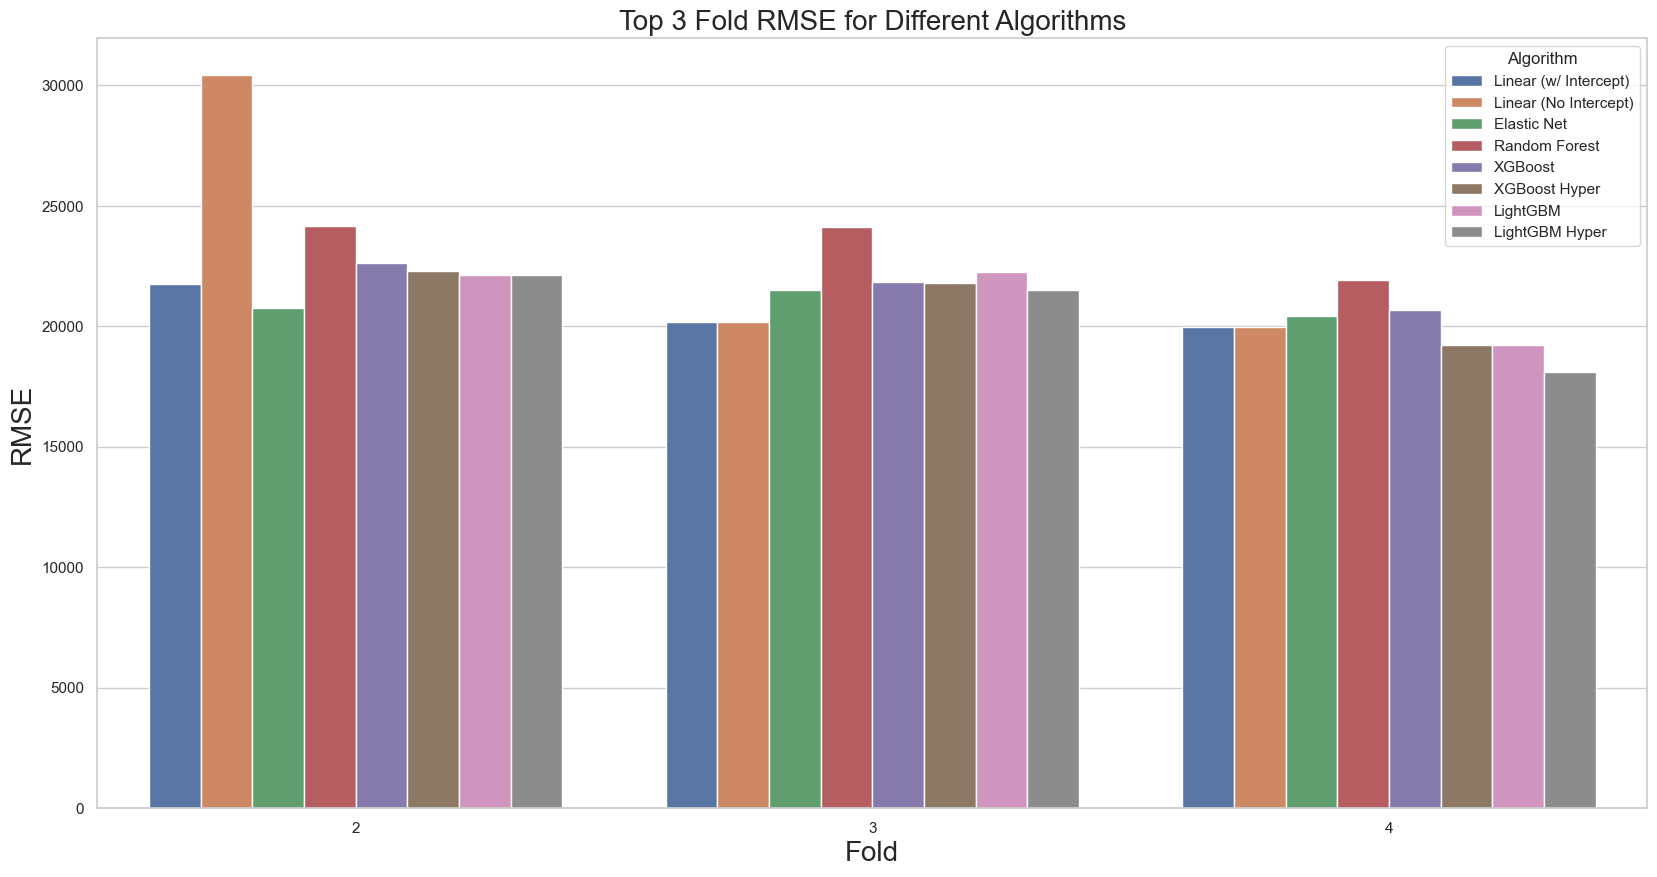

In [66]:
# Set the style of seaborn for better aesthetics (optional)
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(20, 10))
sns.barplot(x="Fold", y="RMSE", hue="Algorithm", data=rmse_df)
plt.title("Top 3 Fold RMSE for Different Algorithms", fontsize=20)
plt.xlabel("Fold", fontsize=20)
plt.ylabel("RMSE", fontsize=20)
plt.show()

We see a clear trend that as we train with more data, the RMSE in the holdout set decreases (i.e. the RMSE for out of fold set is the lowest in the final fold, 4, as it has the most data to train with)

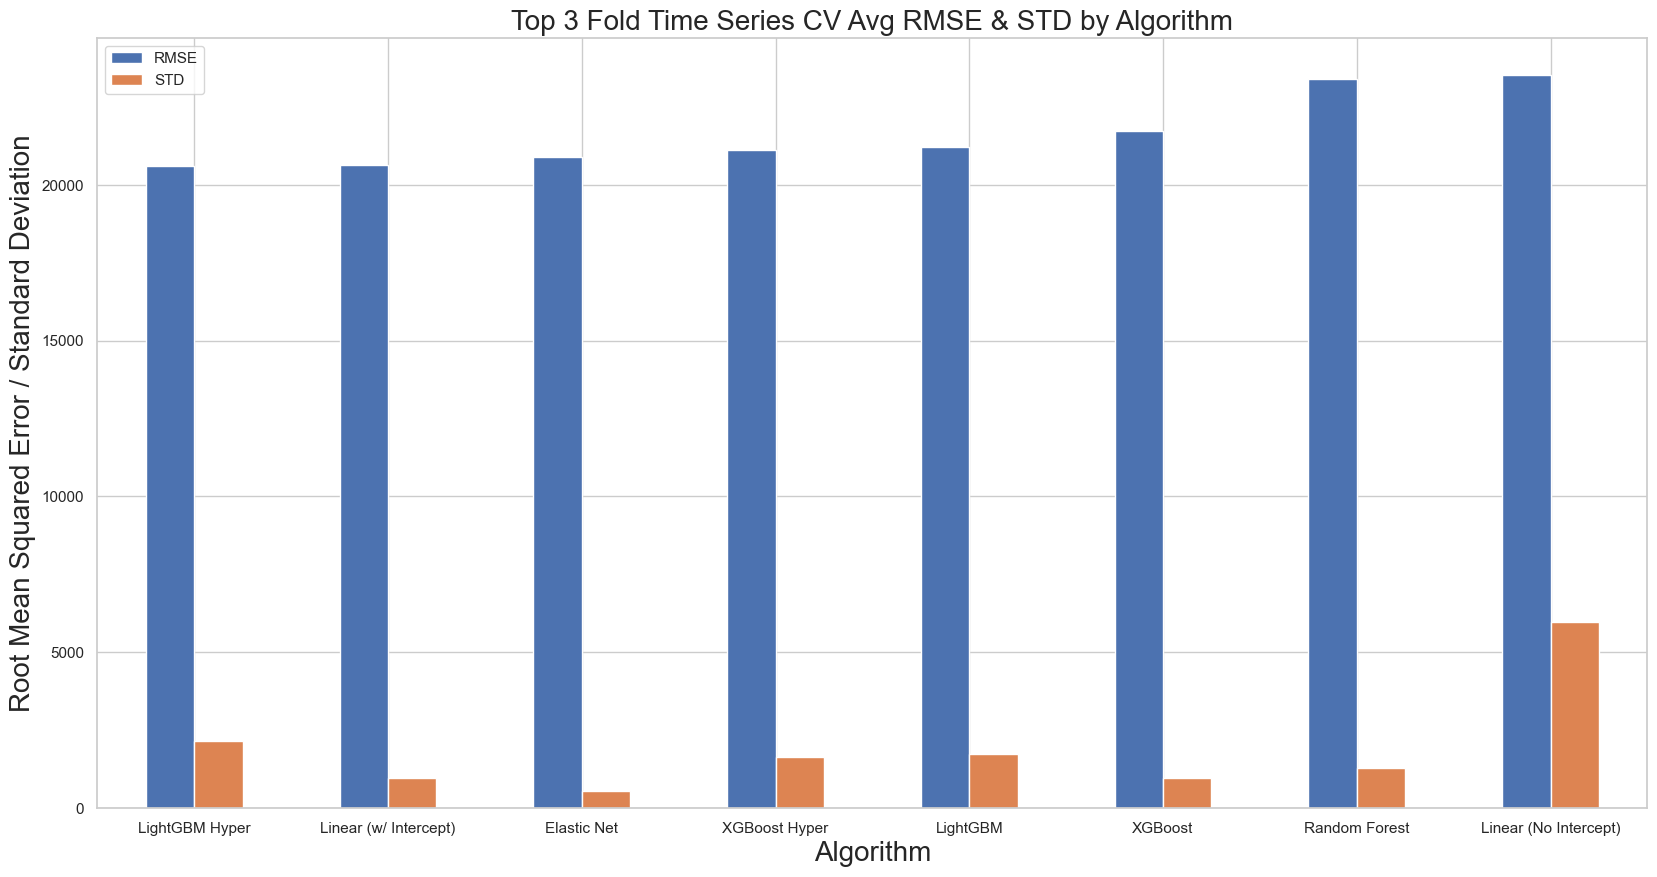

In [67]:
upper_folds_rmse = (
    rmse_df.groupby("Algorithm")["RMSE"].agg(["mean", "std"]).reset_index()
)
upper_folds_rmse = upper_folds_rmse.rename(columns={"mean": "RMSE", "std": "STD"})
upper_folds_rmse = upper_folds_rmse.sort_values(by="RMSE", ascending=True)

# creating the bar plot
upper_folds_rmse.plot(
    kind="bar", x="Algorithm", y=["RMSE", "STD"], figsize=(20, 10), rot=0
)
plt.xlabel("Algorithm", fontsize=20)
plt.ylabel("Root Mean Squared Error / Standard Deviation", fontsize=20)
plt.title("Top 3 Fold Time Series CV Avg RMSE & STD by Algorithm", fontsize=20)
plt.show()

Moving forward we will be focusing on tuning the XGBoost, LightGBM (both hyperparameter tuned), linear with intercept, and elastic net models

Let's create a meta-learner model to try and maximize our model performance

Meta learner taken from: https://www.kaggle.com/code/serigne/stacked-regressions-top-4-on-leaderboard

#### Meta Model

In this approach, we add a meta-model on base models and use the out-of-folds predictions of these base models to train our meta-model.

The procedure, for the training part, may be described as follows:
1. Split the total training set into two disjoint sets (train and test/holdout)
2. Train several base models on the first part (train)
3. Test these base models on the second part (holdout)
4. Use the predictions from 3 (called out-of-folds predictions) as the inputs, and the correct responses (target variable) as the outputs to train a higher level learner called meta-model.

The first three steps are done iteratively. If we take for example a 5-fold stacking, we first split the training data into 5 folds. Then we will do 5 iterations. In each iteration, we train every base model on 4 folds and predict on the remaining fold (holdout fold).

So, we will be sure, after 5 iterations , that the entire data is used to get out-of-folds predictions that we will then use as new feature to train our meta-model in the step 4.

For the prediction part, We average the predictions of all base models on the test data and used them as meta-features on which, the final prediction is done with the meta-model.

For our metal models, it is best to use more complex models for the base learner, and a more simplistic model for the meta-model to avoid overfitting.

![Meta learner image](images/meta_learner.jpg)

![Meta learner stacking image](images/meta_learner_stacking.jpg)

In [68]:
# Example usage of StackedEnsembleCVRegressor:
# base_models = [RandomForestRegressor(random_state=42), LinearRegression()]
# meta_model = RandomForestRegressor(random_state=42)
# stacked_averaged_models = StackedEnsembleCVRegressor(base_models, meta_model)
# score = rmsle_cv(stacked_averaged_models)

In [69]:
base_models = [model_lgb_hyper, model_xgb_hyper, lr_w_int]
meta_model = elastic_net
elastic_ensemble = StackedEnsembleCVRegressor(base_models, meta_model)

In [70]:
(
    elastic_ensemble_preds_df,
    elastic_ensemble_rmse,
    elastic_ensemble_split_dates,
    num_records,
) = time_series_split_regression(housing_df, regressor=elastic_ensemble)

print_rmse_and_dates(
    elastic_ensemble_rmse,
    elastic_ensemble_split_dates,
    num_records,
    "Elastic Ensemble Meta Model",
)

Split 1: Min Date: 2006-09-01, Max Date: 2007-06-01, RMSE: 26446.80012868488, Train Records: 492, Test Records: 487
Split 2: Min Date: 2007-06-01, Max Date: 2008-04-01, RMSE: 24200.003834648225, Train Records: 979, Test Records: 487
Split 3: Min Date: 2008-04-01, Max Date: 2009-01-01, RMSE: 19869.35925226449, Train Records: 1466, Test Records: 487
Split 4: Min Date: 2009-01-01, Max Date: 2009-09-01, RMSE: 19382.79915644678, Train Records: 1953, Test Records: 487
Split 5: Min Date: 2009-09-01, Max Date: 2010-07-01, RMSE: 18410.119768625857, Train Records: 2440, Test Records: 487
Elastic Ensemble Meta Model RMSE score: 21661.8164 (3108.6595)



In [71]:
# Define the data dictionary
# remove a few models to make the next chart easier to digest
rmse_data = {
    "Linear (w/ Intercept)": lr_w_int_rmse,
    # "Linear (No Intercept)": lr_no_int_rmse,
    "Elastic Net": elastic_net_rmse,
    # "Random Forest": rf_rmse,
    "XGBoost": xg_rmse,
    "XGBoost Hyper": xg_hyper_select_rmse,
    "LightGBM": lgbm_rmse,
    "LightGBM Hyper": xg_hyper_select_rmse,
    "Elastic Ensemble Meta Model": elastic_ensemble_rmse,
    # "Linear (w/ Int & XG Impute)": linear_xg_impute_rmse,
    # "Decision Tree": dt_rmse,
    # "Nearest Neighbor": nn_rmse,
}

# Create DataFrames for each algorithm and add a 'Algorithm' column
dfs = {
    key: pd.DataFrame(
        values, columns=["RMSE", "Fold"], index=range(1, len(values) + 1)
    ).assign(Algorithm=key)
    for key, values in rmse_data.items()
}

# Concatenate all DataFrames into a single DataFrame
rmse_df = pd.concat(dfs.values(), ignore_index=True)

# Filter out folds 0 and 1 because train-test ratio is less than 70/30
# Also, the number of records is below 500 in these fold's train sets
rmse_df = rmse_df[rmse_df["Fold"].isin([2, 3, 4])]

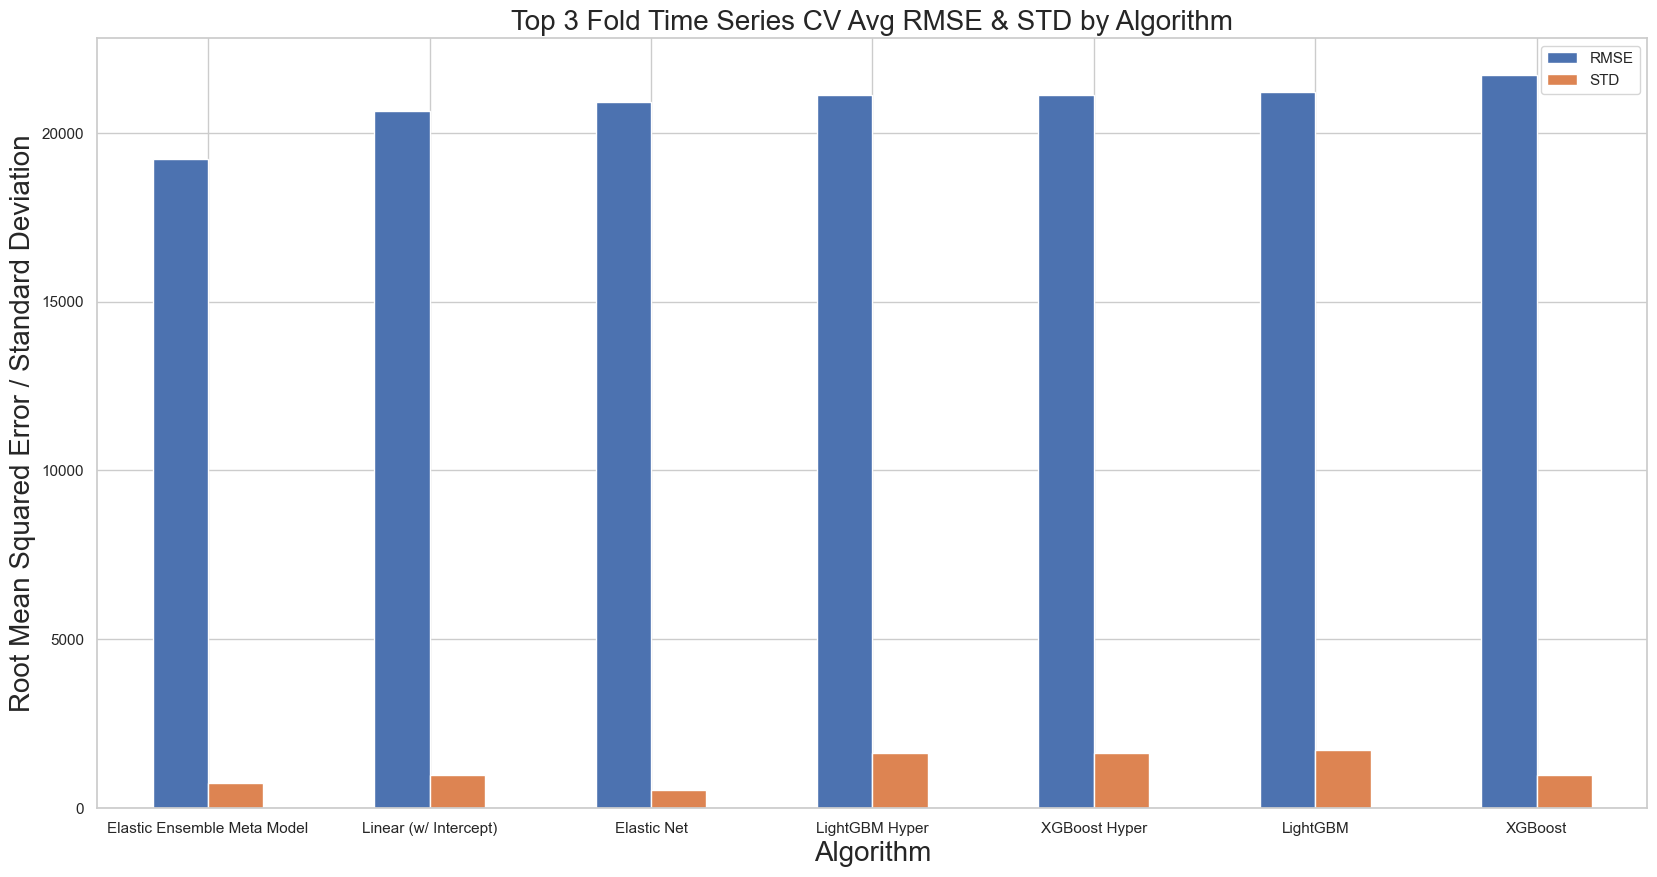

In [72]:
upper_folds_rmse = (
    rmse_df.groupby("Algorithm")["RMSE"].agg(["mean", "std"]).reset_index()
)
upper_folds_rmse = upper_folds_rmse.rename(columns={"mean": "RMSE", "std": "STD"})
upper_folds_rmse = upper_folds_rmse.sort_values(by="RMSE", ascending=True)

# creating the bar plot
upper_folds_rmse.plot(
    kind="bar", x="Algorithm", y=["RMSE", "STD"], figsize=(20, 10), rot=0
)
plt.xlabel("Algorithm", fontsize=20)
plt.ylabel("Root Mean Squared Error / Standard Deviation", fontsize=20)
plt.title("Top 3 Fold Time Series CV Avg RMSE & STD by Algorithm", fontsize=20)
plt.show()

Looks like our meta learner is our best performer. Lets start digging into where our model is performs well, and where it does not.

To do this, let's look at the final fold as this has the most data to train with and is the most recent sale dates.

In [73]:
ee_final_fold_preds = elastic_ensemble_preds_df[
    (elastic_ensemble_preds_df["Fold"] == 4)
    & (elastic_ensemble_preds_df["Set"] == "test")
]
ee_final_fold_preds["difference"] = (
    ee_final_fold_preds["Actual"] - ee_final_fold_preds["Predicted"]
)

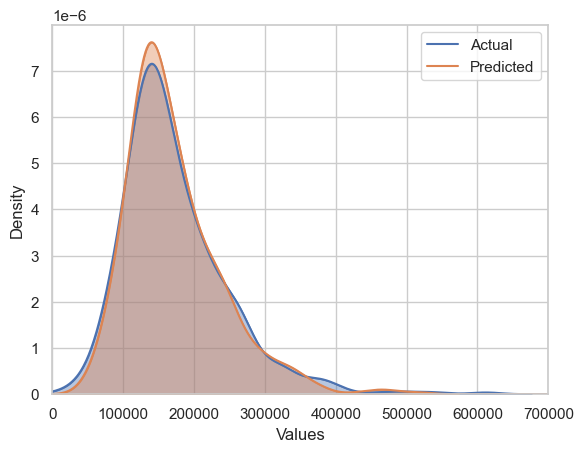

In [ ]:
ee_final_fold_preds[["Actual", "Predicted"]].plot(kind="density", layout=(1, 2))

# Assuming ee_final_fold_preds is a DataFrame with columns "Actual" and "Predicted"
sns.kdeplot(
    data=ee_final_fold_preds["Actual"],
    fill=True,
    common_norm=False,
    alpha=0.4,
    label="Actual",
)
sns.kdeplot(
    data=ee_final_fold_preds["Predicted"],
    fill=True,
    common_norm=False,
    alpha=0.4,
    label="Predicted",
)

# Add labels and legend
plt.title("Actual vs Predicted Densities")
plt.xlabel("Sale Price")
plt.ylabel("Density")
plt.xlim((0, 700000))
plt.show()

In [75]:
# sanity check on predictions
print("min prediction: ", ee_final_fold_preds["Predicted"].min())
print("max prediction: ", ee_final_fold_preds["Predicted"].max())
print("max error: ", ee_final_fold_preds["difference"].max())
print("mean error: ", abs(ee_final_fold_preds["difference"]).mean())
print("median error: ", abs(ee_final_fold_preds["difference"]).median())

min prediction:  47023.30556149632
max prediction:  514688.973270278
max error:  142405.8253431822
mean error:  12798.813537742048
median error:  9331.91661894755


<Axes: >

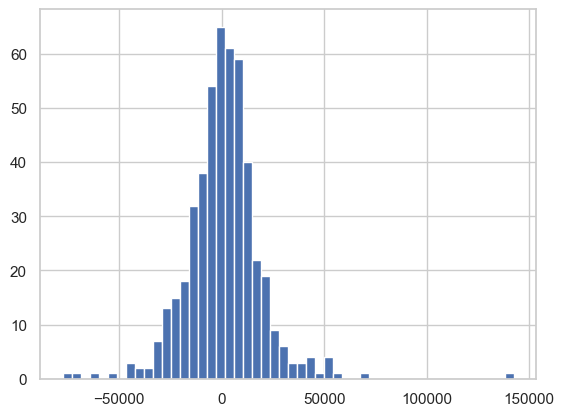

In [76]:
# plot a histogram of the difference of our actuals and predictions
ee_final_fold_preds["difference"].hist(bins=50)

Looks like there is a large outlier we are off by (~150,000). Let's examine this record.

In [77]:
ee_final_fold_preds[ee_final_fold_preds["difference"] >= 120000]

,Id,Actual,Predicted,Fold,Set,difference
7076,528150070,611657,469251.174657,4,test,142405.825343


In [78]:
housing_df[housing_df["Id"] == 528150070]

,Id,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemod/Add,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SalePrice,SalePrice_normalized,ZIP_centroid_LAT,ZIP_centroid_LON,date_sold,TotalSF,MSZoning_A (agr),MSZoning_C (all),MSZoning_FV,MSZoning_I (all),MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_CBlock,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,MiscFeature_Gar2,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_VWD,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,zip_code_50010,zip_code_50011,zip_code_50014,zip_code_50105
44,528150070,2.055642,6.65495,20.913578,0.730463,0.730463,0.0,0.0,2.75025,1.820334,14.196881,14.198437,3.237728,3.34076,11.368345,0.0,1.820334,0.0,2.055642,0.730463,1.194318,14.465577,2.259674,0.0,7.368228,14.665751,0.0,0.730463,14.712138,0.0,0.0,14.712138,0.730463,0.0,1.194318,0.730463,1.194318,0.730463,0.0,3.01134,2.440268,1.194318,1.194318,14.196881,0.0,1.540963,11.574819,2.055642,2.055642,1.194318,0.0,5.887419,0.0,0.0,0.0,0.0,1.540963,1.820334,0.0,1.194318,1.820334,611657,13.323929,5.055263,-93.694448,2010-03-01,17.02819,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,

We can further examine this record to see if there is something erroneous about it. For our purposes, we see our model performs well and our predicted and actual distributions are similar. Some other analysis that could occur:
- EDA on where our model is strong/weak
- Further analysis around records that have the highest RMSE/Error

### Variable Importance Plot

Tree based models (Decision Trees, Random Forest, GBMs) have feature importance plots that allow you to see which features have the most impact on our model. Let's take a look at our XGBoost model that we used in our meta-model to get a sense of which features are the most important.

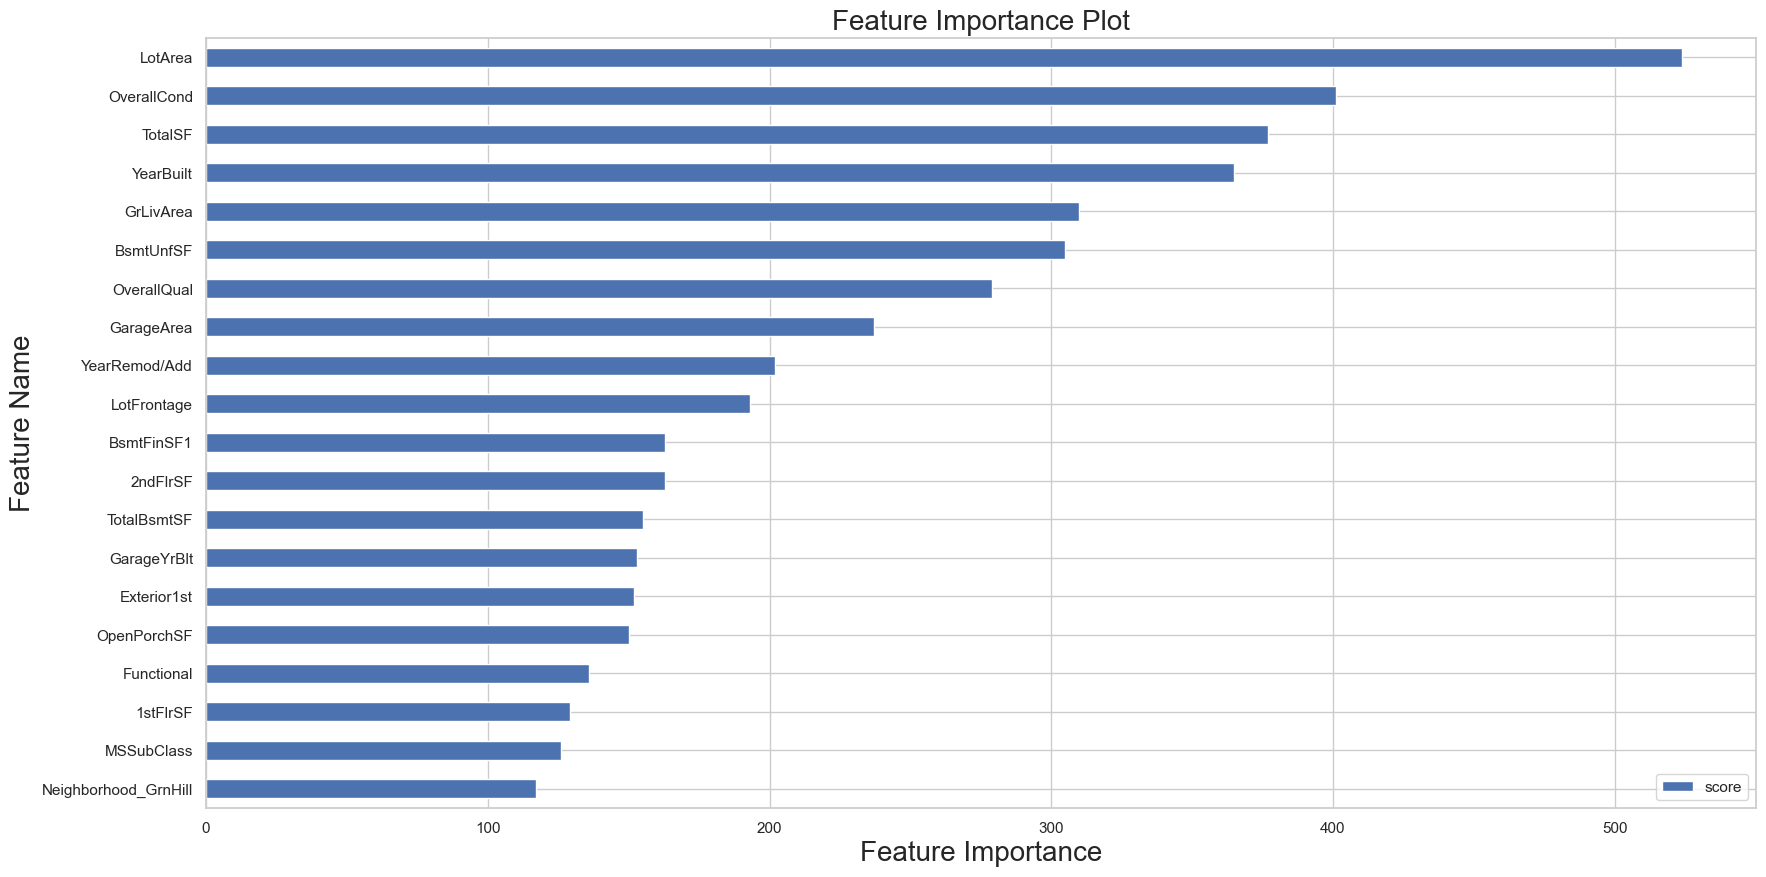

In [79]:
feature_important = model_xgb_hyper.get_booster().get_score(importance_type="weight")

keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(
    by="score", ascending=False
)
data[:20].plot(kind="barh", figsize=(20, 10)).invert_yaxis()
## plot top 20 features
plt.xlabel("Feature Importance", fontsize=20)
plt.ylabel("Feature Name", fontsize=20)
plt.title("Feature Importance Plot", fontsize=20)
plt.show()